# E-commerce Customer Churn Analysis

Created By: Aldira Putri Damayanti

**OUTLINE**

1. Business Problem Understanding
2. Data Understanding
3. Data Cleaning
4. Data Analysis
5. Data Preprocessing dan Feature Engineering
6. Modelling
7. Conclusion and Recommendation

**Business Problem Understanding**

**Introduction**
<br>
<br>

Dalam industri e-commerce yang kompetitif, menjaga pelanggan tetap loyal merupakan salah satu tantangan terbesar yang dihadapi oleh perusahaan. Penelitian menunjukkan bahwa biaya untuk mendapatkan pelanggan baru bisa mencapai lima hingga tujuh kali lipat lebih besar dibandingkan dengan mempertahankan pelanggan yang sudah ada. Oleh karena itu, mempertahankan pelanggan yang loyal menjadi strategi bisnis yang lebih efisien dan menguntungkan bagi perusahaan. 

Salah satu cara untuk meningkatkan loyalitas pelanggan adalah melalui pemberian promosi. Namun, tanpa strategi yang terarah dan data yang mendukung, promosi sering kali menjadi tidak efektif dan bahkan membebani anggaran perusahaan. Hal ini terjadi karena promosi dapat diarahkan pada pelanggan yang salah atau tidak memiliki dampak signifikan terhadap perilaku mereka, sehingga menimbulkan inefisiensi dari segi biaya maupun sumber daya.

Kehilangan pelanggan (customer churn) menjadi ancaman nyata bagi kelangsungan bisnis, terutama jika perusahaan tidak memiliki cara yang efektif untuk mengidentifikasi dan menangani risiko ini. Kemampuan untuk memprediksi apakah seorang pelanggan cenderung churn atau tetap loyal sangat penting untuk memastikan bahwa sumber daya promosi dapat diarahkan dengan lebih tepat sasaran. Selain itu, pemahaman terhadap faktor-faktor yang memengaruhi keputusan pelanggan untuk churn atau tetap loyal memberikan wawasan yang berharga bagi perusahaan dalam merancang pendekatan yang lebih efektif untuk mempertahankan pelanggan.

Dengan latar belakang ini, perusahaan e-commerce berkomitmen untuk membangun strategi berbasis data yang tidak hanya memungkinkan prediksi perilaku pelanggan tetapi juga memberikan pemahaman yang mendalam tentang variabel-variabel yang memengaruhi loyalitas mereka. Pendekatan ini bertujuan untuk meningkatkan efisiensi operasional, mengoptimalkan anggaran promosi, dan menciptakan hubungan jangka panjang yang lebih baik dengan pelanggan.

Sumber: Customer churn 101: What is it, types of churn, and what to do about it. (2024). paddle.com. https://www.paddle.com/resources/customer-churn

**Siapa Stakeholder yang Mengalami Masalah?**

- Perusahaan e-commerce (pemilik bisnis): Mereka yang menghadapi tantangan dalam mempertahankan pelanggan yang loyal, serta ingin meminimalkan biaya akuisisi pelanggan baru.
- Tim pemasaran dan penjualan: Tim yang bertanggung jawab untuk merancang dan melaksanakan strategi untuk mempertahankan pelanggan yang ada dan menarik pelanggan baru.
- Manajemen: Mereka yang perlu membuat keputusan strategis yang berfokus pada pengelolaan biaya dan meningkatkan profitabilitas dengan fokus pada retensi pelanggan.
- Pelanggan: Pelanggan yang sudah ada juga berperan dalam masalah ini, karena mereka menjadi sasaran utama dalam upaya peningkatan loyalitas.

**Problem Statment**
<br>
<br>
Mendapatkan pelanggan baru bisa menghabiskan biaya lima hingga tujuh kali lipat dibandingkan mempertahankan pelanggan lama. Oleh karena itu, perusahaan E-Commerce ingin mempertahankan aktivitas Customer loyal di platform e-commerce dapat dilakukan melalui pemberian promosi. Namun, tanpa adanya strategi yang tepat, promosi tersebut berisiko menjadi tidak efisien, baik dari segi biaya maupun sumber daya yang digunakan.

Masalah spesifik:

- Tingginya biaya akuisisi pelanggan baru yang bisa mencapai lima hingga tujuh kali lipat lebih tinggi daripada mempertahankan pelanggan yang sudah ada.
- Kehilangan pelanggan yang sudah ada, yang berarti potensi pendapatan yang lebih rendah dan berkurangnya nilai seumur hidup pelanggan (Customer Lifetime Value / CLV).
- Kurangnya strategi retensi yang efektif untuk meningkatkan loyalitas pelanggan.

**Goals**
<br>
<br>
Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang Customer akan/ingin Churn pada layanan tersebut atau tidak, sehingga dapat memfokuskan Promosi pada Customer yang tidak akan Churn (Non-Churn).

Selain itu, perusahaan juga ingin mengetahui apa/faktor/variabel apa yang membuat Customer Churn atau Non Churn pada layanan mereka, sehingga perusahaan dapat membuat rencana yang lebih baik dalam mendekati Customer Potensial (Customer yang Non Churn). 

**Analytical Approach**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan Customer yang Churn dan Non Churn. 

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan E-Commerce untuk dapat memprediksi probabilitas seorang kandidat akan/ingin Churn di layanan e-commerce tersebut atau tidak.

**Metrics Evaluation**

Target :
<br>
0 = Customer Non-Churn
<br>
1 = Customer Churn 

Type 1 Error : False Positive 
Konsekuensi: Promosi akan sia-sia, tidak 

Type 2 Error : False Negative
Konsekuensi: Kehilangan Customer (Churn)

Berdasarkan konsekuensinya, langkah yang tepat untuk pemilihan model adalah model yang mengurangi hilangnya Customer loyal (Churn), tetapi tetap memperhatikan pengeluaran biaya promosi untuk pelanggan yang kurang tepat. Recall dan precision yang diseimbangkan akan dari kelas positif (Customer churn). Metrik yang akan digunakan adalah ROC-AUC.

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import matplotlib.patches as mpatches
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.over_sampling import SMOTE

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Saving Model
import pickle

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Load Dataset
df = pd.read_csv ('data_ecommerce_customer_churn.csv')
display (df.head(), df.tail())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


In [4]:
# Count and Datatype setiap Kolom
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (3941, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [5]:
#Informasi Statistik Deskriptif
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [6]:
#Mengetahui Jumlah Unique Values
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[19.0, 17.0]"
1,WarehouseToHome,float64,169,4.29,33,"[127.0, 20.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[5, 2]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Fashion]"
4,SatisfactionScore,int64,0,0.00,5,"[1, 5]"
5,MaritalStatus,object,0,0.00,3,"[Divorced, Single]"
6,NumberOfAddress,int64,0,0.00,14,"[1, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[31.0, 4.0]"
9,CashbackAmount,float64,0,0.00,2335,"[159.14, 178.61]"


### Attribute Information

| Attribute | Data Type | Description | 
| --- | --- | --- |
| Tenure | Float | Durasi Customer menggunakan Platform | 
| WareHouseToHome | Float | Jarak antara Gudang dan Rumah Customer |
| NumberOfDevicesRegistered | Integer | Jumlah Device yang terdaftar pada Customer tertentu |
| PreferedOrederCat | Object | Kategori pesanan yang lebih disukai Customer pada bulan lalu |
| SatisfactionScore | Integer | Kepuasan Customer terhadap pelayanan |
| MaritalStatus | Object | Status perkawinan Customer | 
| NumberOfAddress | Integer | Jumlah alamat yang terdaftar | 
| Complaint | Integer | Komplain yang muncul satu bulan terakhir (1: Complain, 0: Tidak Complain) | 
| DaySinceLastOrder | Float | Hari terakhir sejak pesanan terakhir oleh Customer | 
| CashbackAmount | Float | Rata-rata Cashback bulan lalu |
| Churn | Integer | Customer yang meninggalkan layanan (1: Churn, 0: Non-Churn) | 

<b>Keterangan Dataset: </b>

- Dataset berisikan 3941 baris dan 11 kolom unique
- Dari informasi dataset, terdapat beberapa data missing value
- Data terbagi menjadi 3 Tipe Variabel:
<br>
<b> 1. Tipe Variabel Numerical: </b>
        Tenure, WareHouseToHome, NumberOfDevicesRegistered, NumberOfAddress, DaySinceLastOrder, CashbackAmount
<br>
<b> 2. Tipe Variabel Ordinal: </b>
        SatisfactionScore
<br>
<b> 3. Tipe Nominal: </b> 
        PreferedOrderCat, MaritalStatus, Complaint, Churn

# DATA CLEANING #

**Mengecek Data Typo dan Duplikat**

In [7]:
# Data unik masing-masing fitur
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures','unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,unique,uniqueSample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Berdasarkan dataset diatas, untuk kolom Prefered Order Category terdapat 6 kategori antara lain; Laptop&Accessory, Mobile, Fashion, Mobile Phone, Grocery dan Others. Untuk Mobile dan Mobile Phone merupakan kategori yang sama, sehingga semua data untuk kategori 'Mobile Phone' akan diganti menjadi 'Mobile'.

**Mengubah Mobile Phone menjadi Mobile**

In [8]:
#Menghitung Jumlah per Kategori
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

In [9]:
#Mengubah 'Mobile Phone' menjadi 'Mobile'
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace ('Mobile Phone', 'Mobile')
df ['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile                1446
Fashion                585
Grocery                273
Others                 179
Name: count, dtype: int64

In [10]:
display(df.head(),df.tail())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


**Data Duplikat**

In [11]:
#Mengetahui data duplikat
data_duplikat = df.duplicated().sum()
data_duplikat

np.int64(672)

Terdapat 672 data duplikat dari total 3.941 baris. Karena dataset ini tidak memiliki identifikasi unik seperti nomor pelanggan atau ID pelanggan, baris-baris tersebut dianggap benar-benar duplikat. Oleh karena itu, penghapusan data duplikat akan dilakukan.  

Keberadaan data duplikat dapat berdampak negatif pada model machine learning, karena memberikan bobot berlebih pada data yang sama, sehingga meningkatkan risiko **overfitting**. Hal ini membuat model lebih sulit untuk digeneralisasi dan kurang efektif dalam menangani data baru. Dengan menghapus data duplikat, ukuran dataset menjadi lebih representatif, meningkatkan akurasi model, dan memperbesar peluang model membuat prediksi yang lebih baik pada data yang belum pernah ditemui sebelumnya.

Sumber: https://medium.com/@anishnama20/how-duplicate-entries-in-data-set-leads-to-ovetfitting-2e3376e309c5 

In [12]:
#Menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f'shape data: {df.shape}, cek data duplikat: {df.duplicated().sum()}')

shape data: (3269, 11), cek data duplikat: 0


**Missing Value**

In [13]:
missing_values = df.isnull().sum()
missing_values

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [14]:
# Kalkulasi missing value
print(f'''Jumlah missing value: {df.isnull().sum().sum()}
Persentase Baris dengan missing value: {round(df.isnull().sum().sum()/df.shape[0]*100,2)}%''')

Jumlah missing value: 475
Persentase Baris dengan missing value: 14.53%


Terdapat 475 data missing values dan persentasenya sebesar 14.53%. Ini menunjukkan bahwa data missing values nya cukup besar sehingga kita tidak dapat melakukan drop/penghapusan begitu saja karena akan mengurangi jumlah data dan informasi yang diketahui. Missing value akan dianalisa lebih lanjut dengan menggunakan package missingno, dengan mengetahui tipe data yang hilang dapat mempermudah pemilihan metode handling missing value.

**Bar Plot**

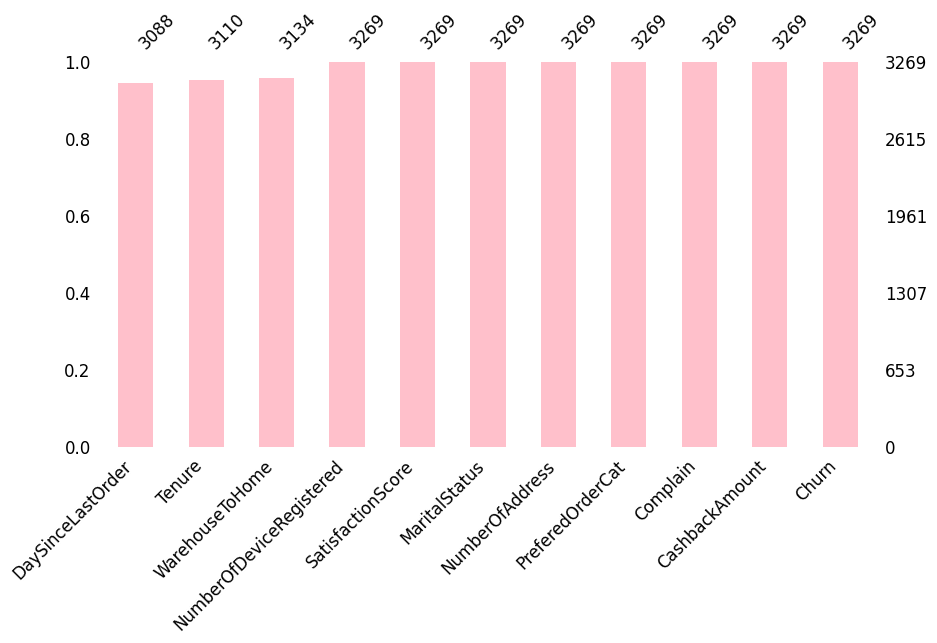

In [15]:
#Melihat missing values dengan Bar Plot
missingno.bar(df,color="pink", sort="ascending", figsize=(10,5), fontsize=12);

- Terlihat dari Bar Plot tersebut, bahwa kolom 'DaySinceLastOrder', 'Tenure' dan 'WarehouseToHome' memiliki missing values/data yang hilang. (informasi ini sebenarnya dapat dilihat juga ditable atas).
- Kemudian berdasarkan Bar Plot tersebut juga, kolom 'WarehouseToHome' adalah kolom yang memiliki data yang hilang terbanyak, sedangkan kolom 'DaySinceLastorder' memiliki sedikit saja data yang hilang dibandingkan ketiga kolom tersebut.

**Matrix Plot**

<Axes: >

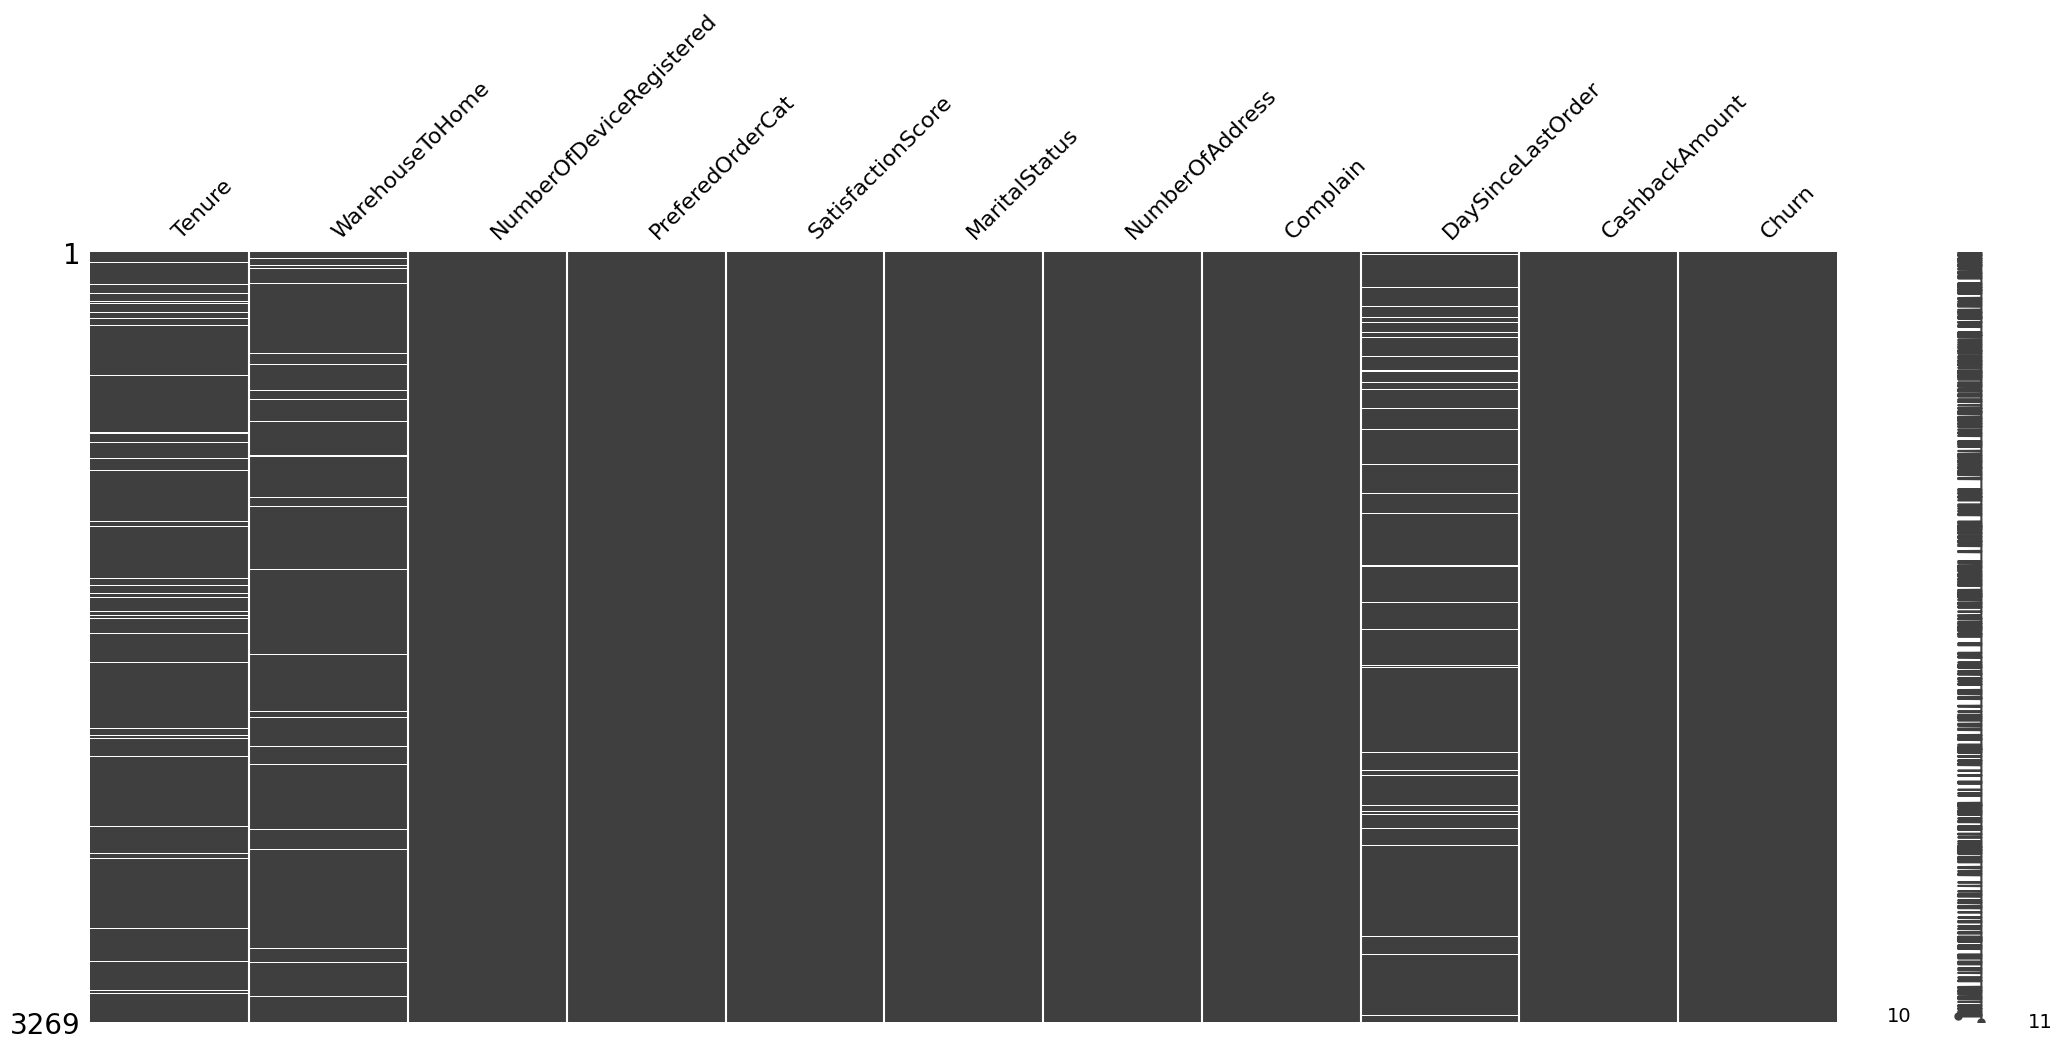

In [16]:
#Melihat Missing Values dengan Matrix Plot
missingno.matrix(df)

Terlihat bahwa missing value tidak menunjukkan pola tertentu dan cukup acak. 

**Heatmap**
<br>
<br>
Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

- -1 - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
- 0 - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
- 1 - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

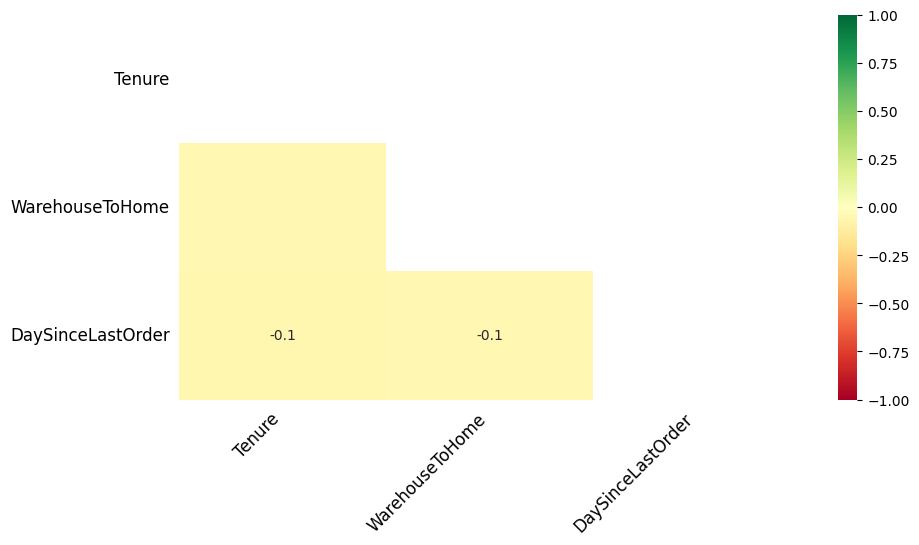

In [17]:
c

Berdasarkan heatmap yang ditampilkan, berikut adalah kesimpulan yang dapat diambil:
<br>
<br>
- Nilai Korelasi:

Korelasi antara variabel "Tenure," "WarehouseToHome," dan "DaySinceLastOrder" sangat rendah, sekitar -0.1 pada beberapa pasangan variabel. Ini menunjukkan bahwa tidak ada hubungan linear yang signifikan antara variabel-variabel tersebut.

- Interpretasi:

Variabel-variabel ini bersifat independen satu sama lain, artinya perubahan dalam satu variabel tidak memiliki pengaruh yang berarti terhadap variabel lainnya.
Korelasi negatif yang kecil (-0.1) mengindikasikan adanya hubungan yang sangat lemah dan tidak cukup signifikan untuk diinterpretasikan sebagai pola yang bermakna.

**Dendogram**

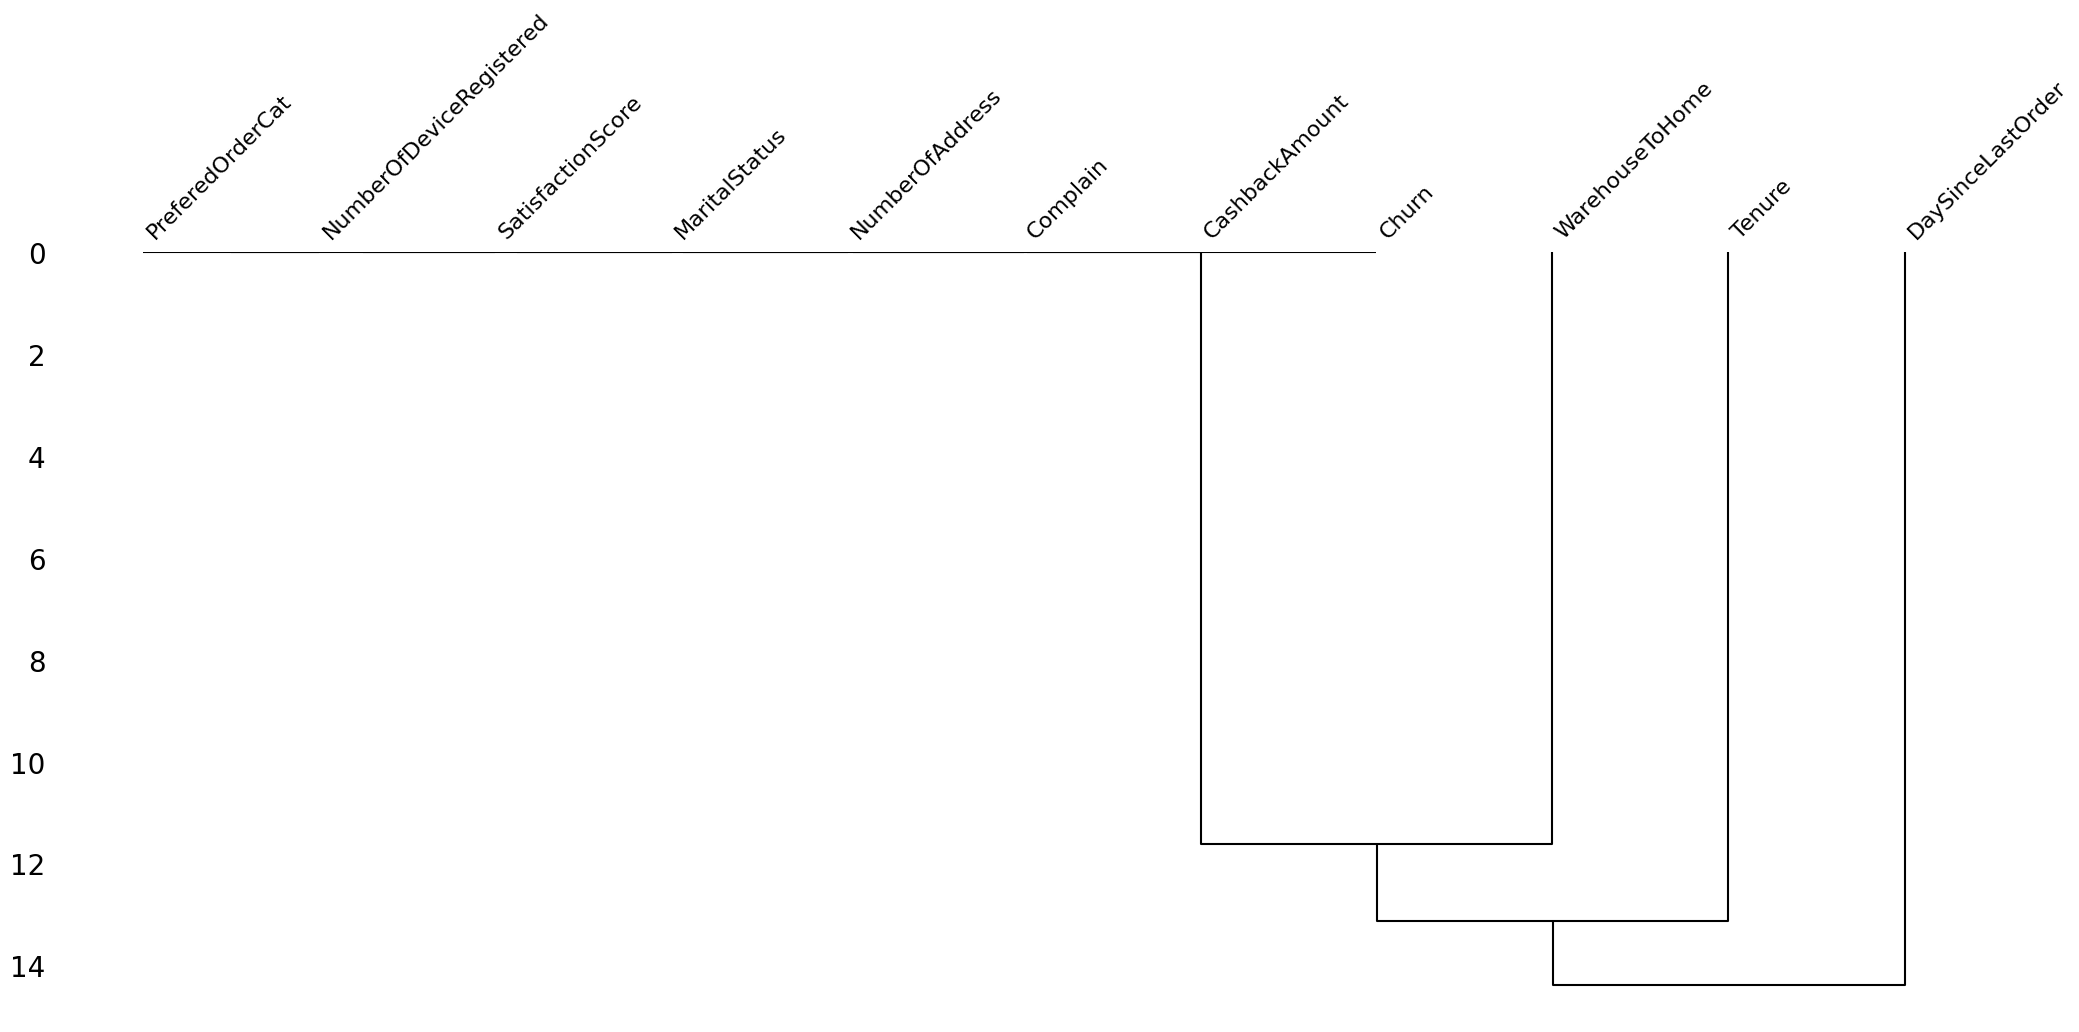

In [18]:
missingno.dendrogram(df)
plt.show()

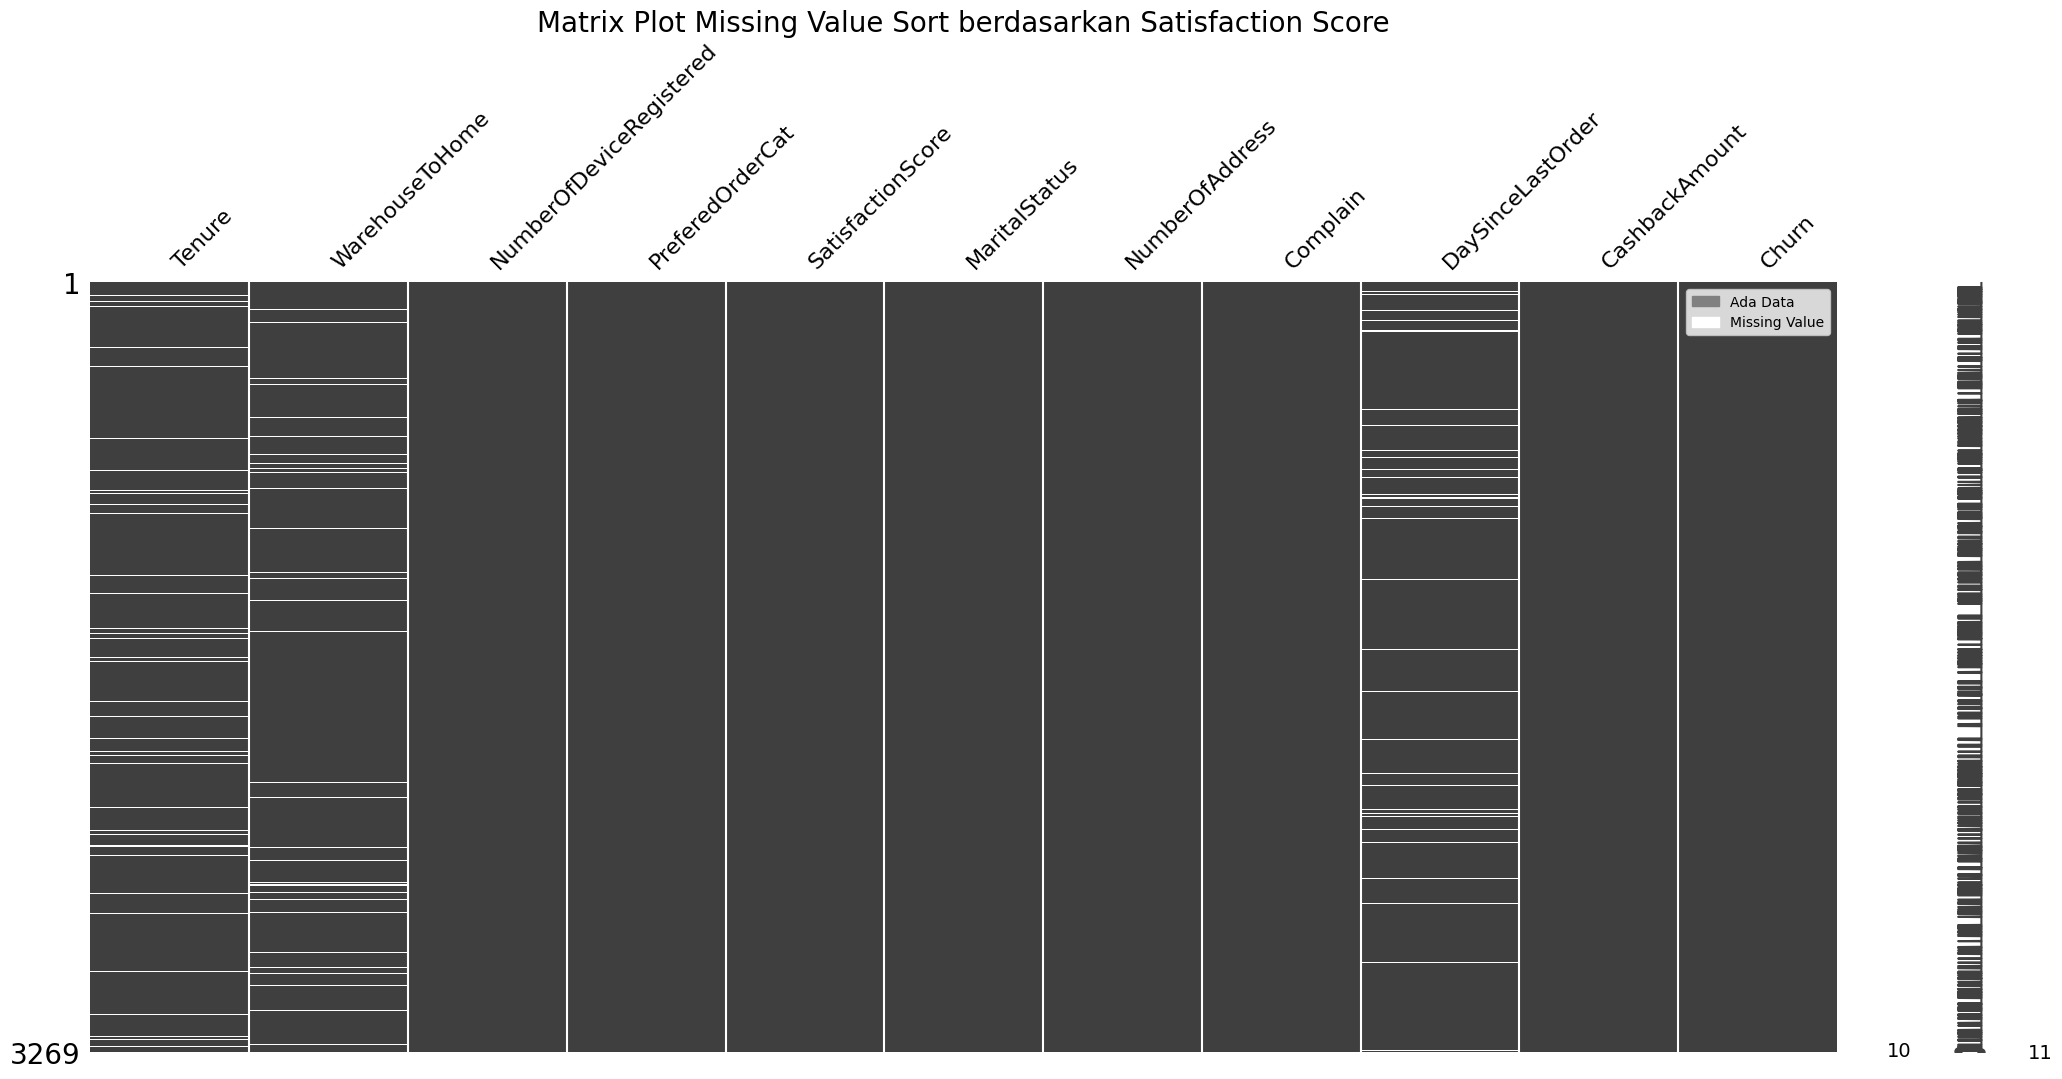

In [19]:
# Matrix missingness berdasarkan satisfaction score
missingno.matrix(df.sort_values(by=['SatisfactionScore'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Satisfaction Score', fontsize=20)
plt.show()

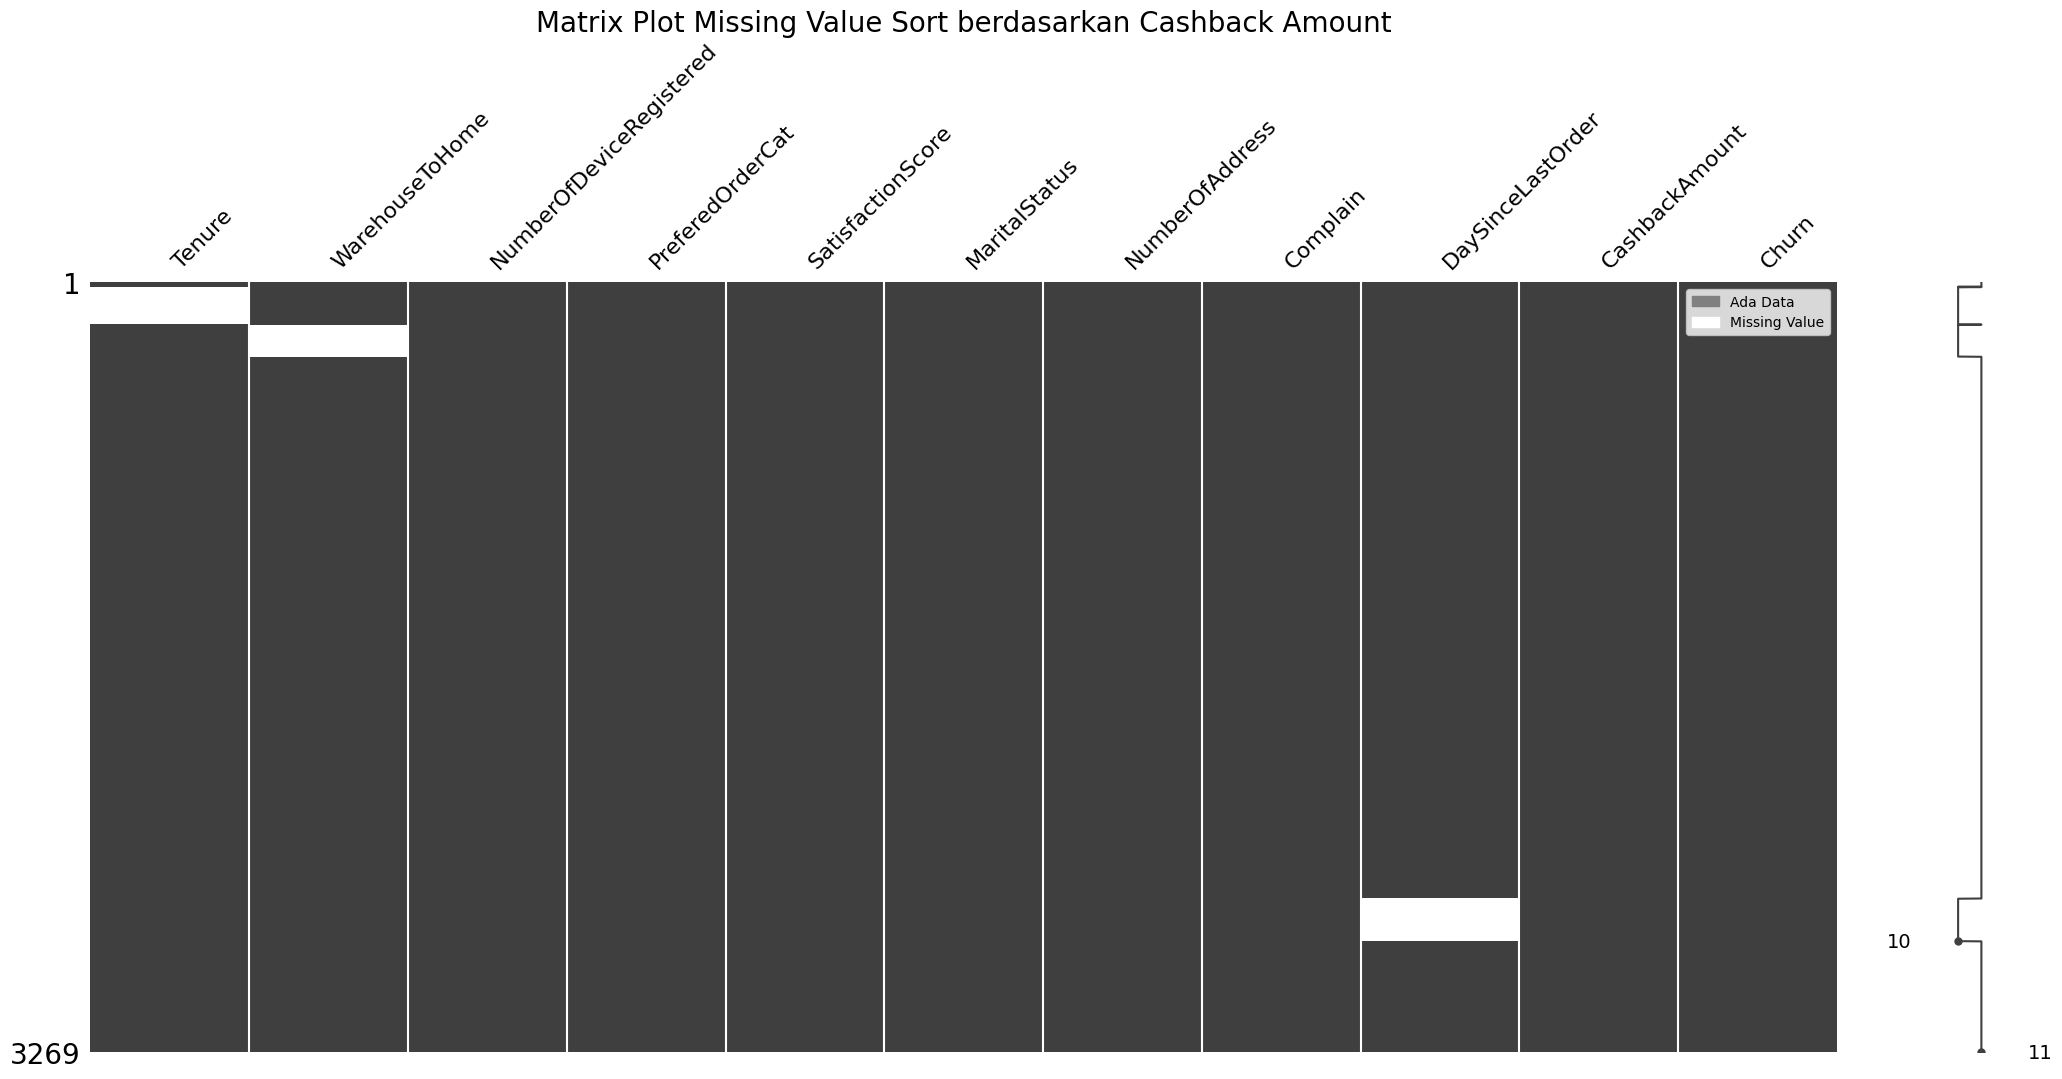

In [20]:
# Matrix missingness berdasarkan Cashback Amount
missingno.matrix(df.sort_values(by=['CashbackAmount'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Cashback Amount', fontsize=20)
plt.show()

In [21]:
# Describe kolom missing value berdasarkan tenure
df[df['Tenure'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,0.0,159.000000,159.000000,159,159.000000,159,159.000000,159.000000,159.000000,159.000000,159.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,152,NaN,75,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.408805,3.238994,NaN,3.100629,NaN,3.201258,0.264151,2.150943,120.415535,0.295597
std,NaN,7.680498,0.822616,NaN,1.303331,NaN,2.425549,0.442273,2.413540,2.744332,0.457753
min,NaN,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,112.000000,0.000000
25%,NaN,8.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,120.280000,0.000000
50%,NaN,13.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,121.090000,0.000000
75%,NaN,19.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,3.000000,122.180000,1.000000


In [22]:
# Describe kolom missing value berdasarkan DaySinceLastOrder
df[df['DaySinceLastOrder'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,181.000000,181.000000,181.000000,181,181.000000,181,181.000000,181.000000,0.0,181.000000,181.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Fashion,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,138,NaN,102,NaN,NaN,NaN,NaN,NaN
mean,11.812155,15.718232,4.077348,NaN,2.883978,NaN,4.850829,0.259669,NaN,220.978232,0.165746
std,8.492354,8.251138,0.933682,NaN,1.434812,NaN,2.585185,0.439669,NaN,6.544886,0.372884
min,0.000000,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,NaN,209.340000,0.000000
25%,5.000000,9.000000,4.000000,NaN,1.000000,NaN,3.000000,0.000000,NaN,215.100000,0.000000
50%,10.000000,14.000000,4.000000,NaN,3.000000,NaN,4.000000,0.000000,NaN,221.370000,0.000000
75%,19.000000,19.000000,5.000000,NaN,4.000000,NaN,6.000000,1.000000,NaN,227.210000,0.000000


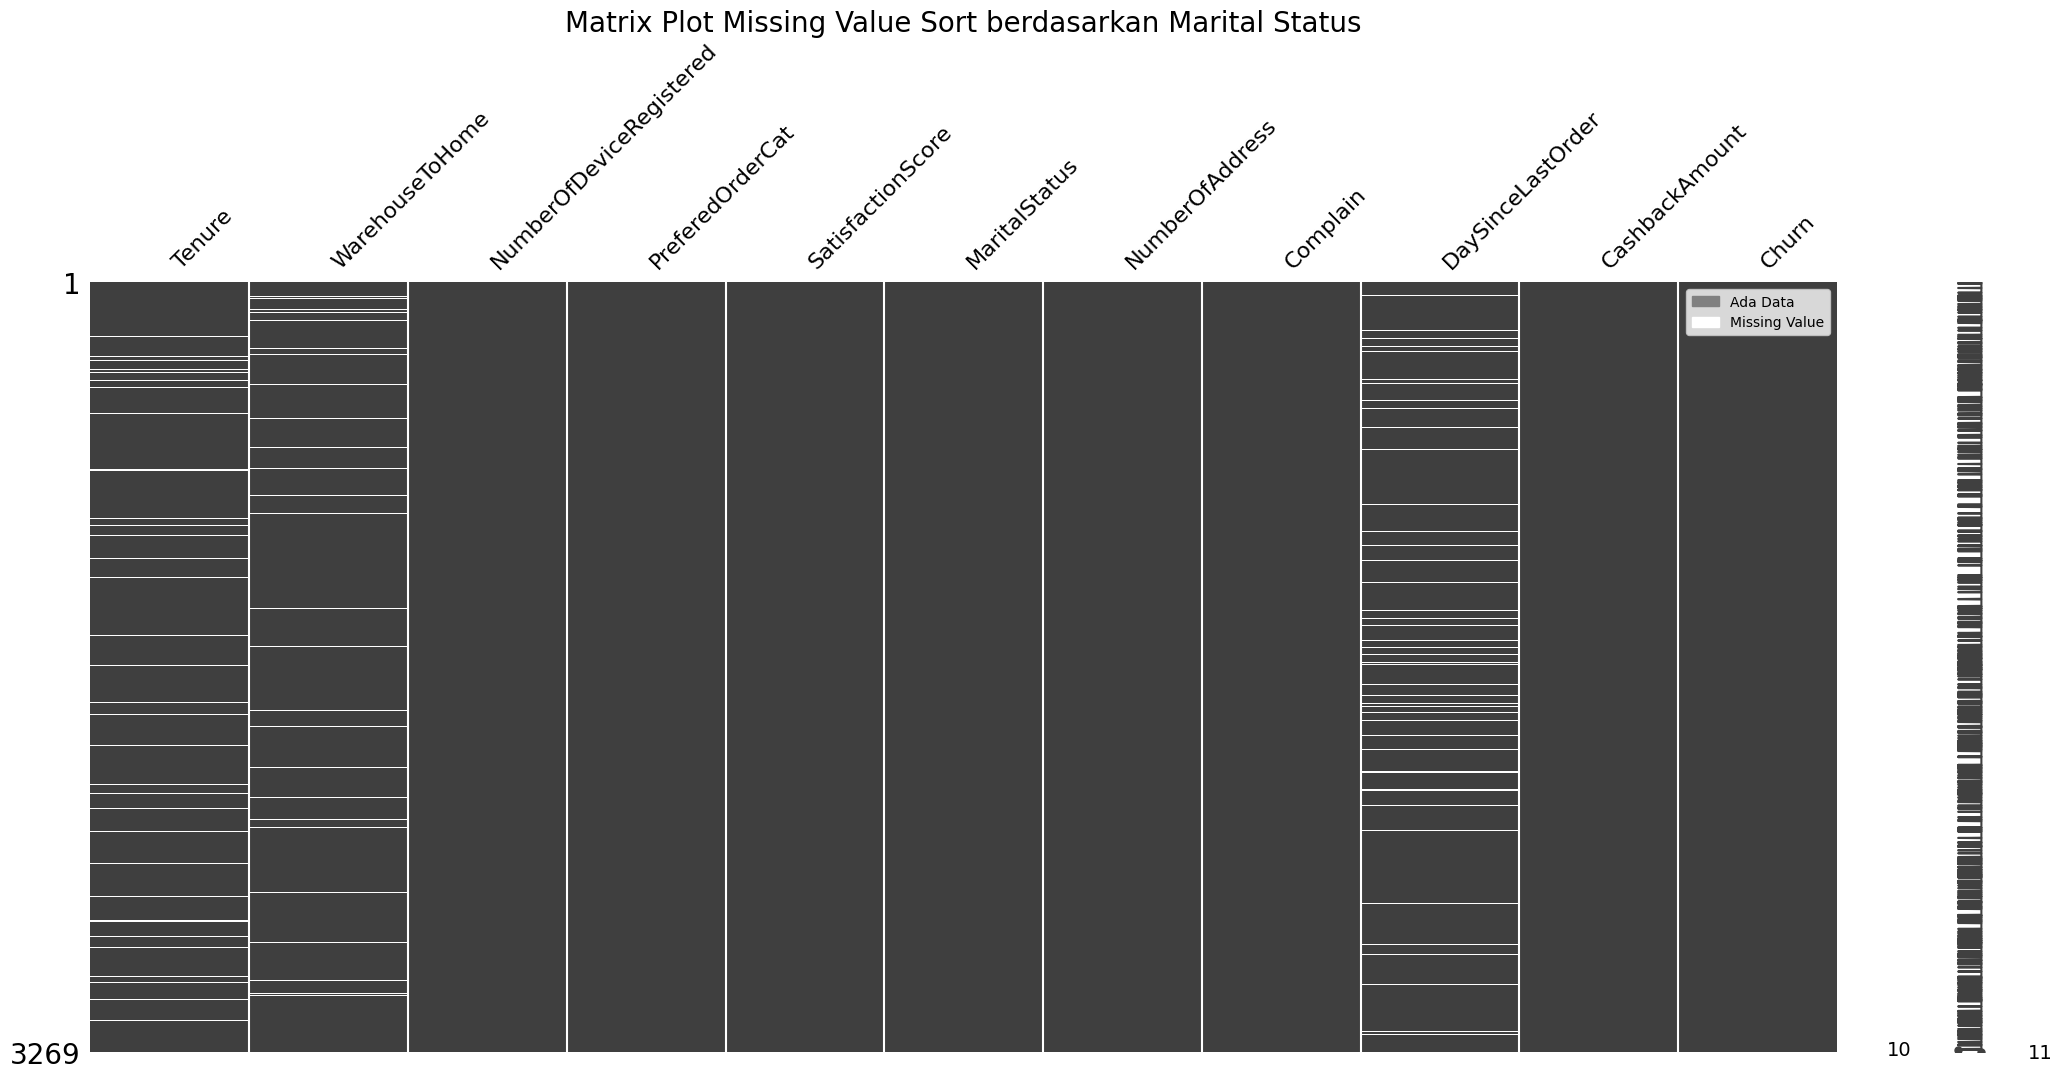

In [23]:
# Matrix missingness berdasarkan Marital Status
missingno.matrix(df.sort_values(by=['MaritalStatus'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Marital Status', fontsize=20)
plt.show()

Berdasarkan grafik diatas, dapat disimpulkan bahwa missing value yang ada termasuk dalam kategori MAR (Missing at Random) dan berhubungan dengan kolom CashbackAmount. Metode yang cocok untuk menangani missing value ini adalah Iterative Imputation, karena data yang hilang bersifat multivariat dan dipengaruhi oleh variabel lain. Selain itu, penggunaan median untuk menangani missing value tidak disarankan karena banyaknya data yang hilang, yang dapat menghasilkan data bias dan mempengaruhi hasil model. Sebelum mengaplikasikan metode ini, percobaan akan dilakukan untuk membandingkan distribusi kolom Tenure, WarehouseToHome, dan DaySinceLastOrder sebelum dan setelah imputasi, dengan harapan perbedaan distribusi tidak terlalu signifikan.

In [24]:
# Melihat total data hilang dengan kategori Married pada Marital Status
(df[df['MaritalStatus']=='Married'].isna().sum()/df.isna().sum())*100

Tenure                      47.169811
WarehouseToHome             42.222222
NumberOfDeviceRegistered          NaN
PreferedOrderCat                  NaN
SatisfactionScore                 NaN
MaritalStatus                     NaN
NumberOfAddress                   NaN
Complain                          NaN
DaySinceLastOrder           56.353591
CashbackAmount                    NaN
Churn                             NaN
dtype: float64

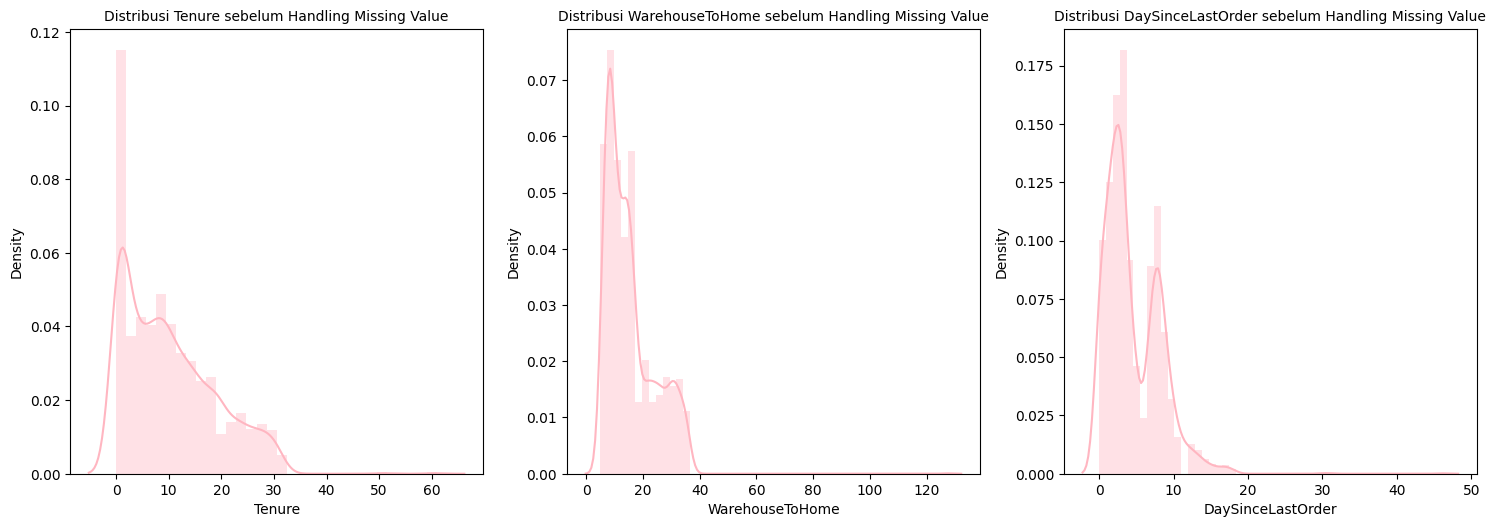

In [25]:
# Percobaan melihat distribusi imputasi dengan iterative imputer (Data sebelum handling missing value)
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder']
plt.figure(figsize=(15,15))

for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.distplot(df[features[i]], color='#FFB6C1')
  plt.tight_layout()
  plt.title(f'Distribusi {features[i]} sebelum Handling Missing Value', fontsize=10)

Text(0.5, 1.0, 'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value')

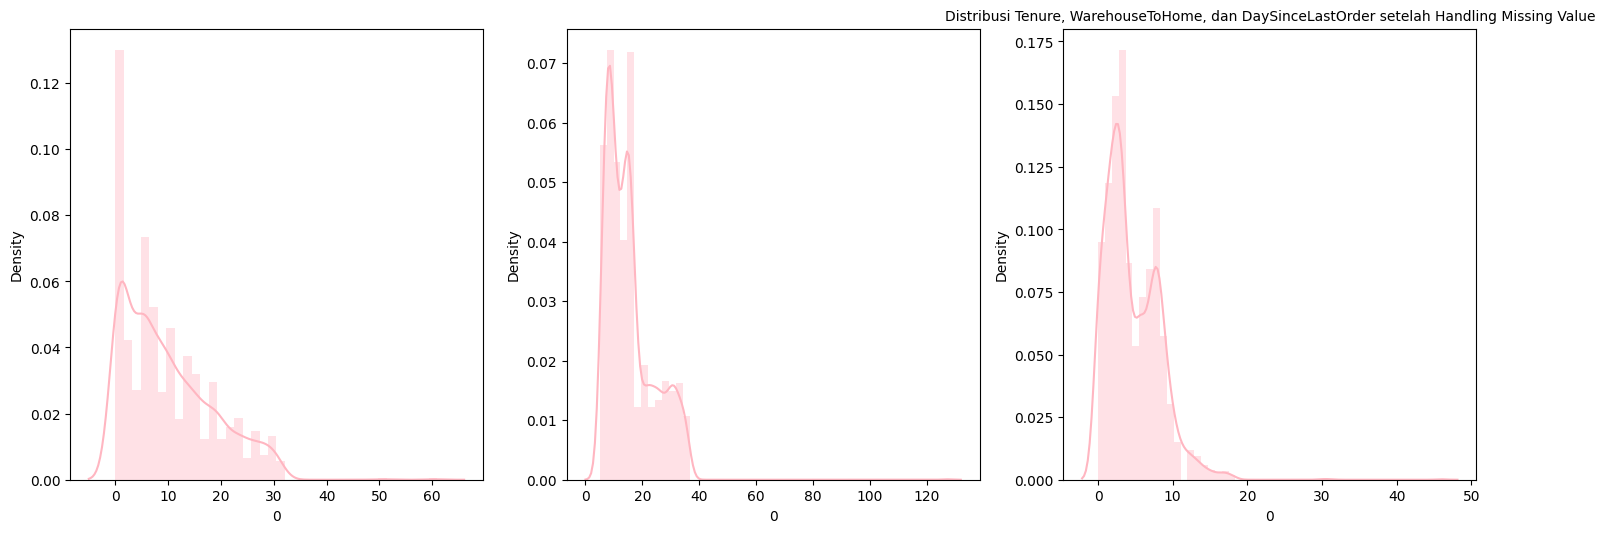

In [26]:
# Melihat distribusi masing-masing data setelah imputasi
imputer = IterativeImputer(random_state=0)
TenureAft = pd.DataFrame(imputer.fit_transform(df[['Tenure','CashbackAmount']]))
WarehouseToHomeAft = pd.DataFrame(imputer.fit_transform(df[['WarehouseToHome','CashbackAmount']]))
DaySinceLastOrderAft = pd.DataFrame(imputer.fit_transform(df[['DaySinceLastOrder','CashbackAmount']]))

ImputerDataFrame = [TenureAft,WarehouseToHomeAft, DaySinceLastOrderAft]
plt.figure(figsize=(15,15))
a=0
for i in ImputerDataFrame:
  plt.subplot(3, 3, a+1)
  sns.distplot(i[0], color='#FFB6C1')
  plt.tight_layout()
  a+=1
plt.title(f'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value', fontsize=10)

Data sebelum dan setelah imputasi memiliki selisih distribusi yang tidak terlalu berbeda. Handling missing value akan dilakukan pada saat data preprocessing.

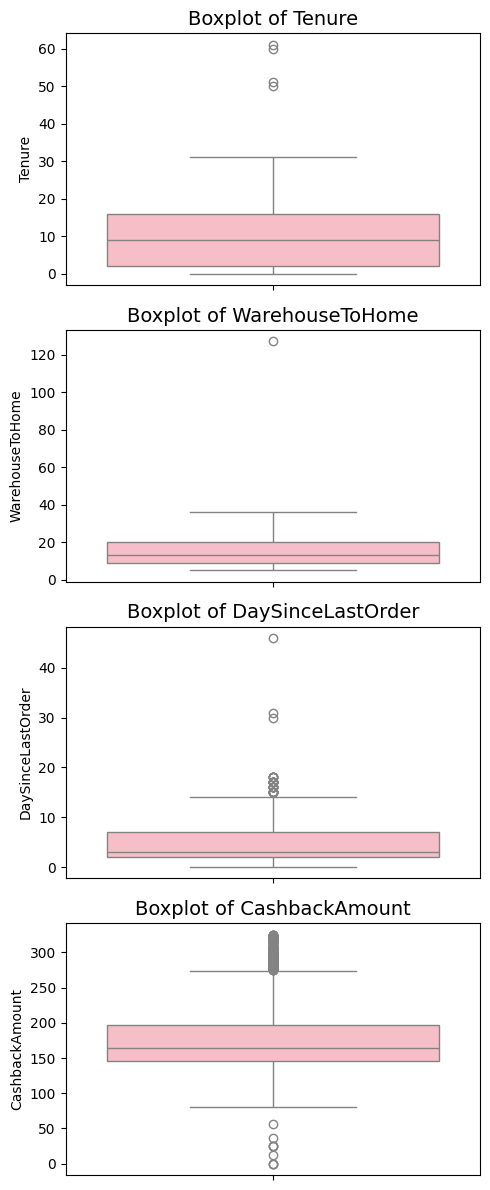

In [27]:
# Melihat outlier menggunakan boxplot pada data kontinu
features = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

# Membuat plot dengan ukuran figure yang lebih rapi
plt.figure(figsize=(5, 12))

# Loop untuk membuat boxplot setiap fitur
for i in range(len(features)):
    plt.subplot(4, 1, i + 1)  # Subplot untuk masing-masing fitur
    sns.boxplot(
        y=df[features[i]], 
        color='#FFB6C1',  # Warna merah pastel menggunakan kode hex
        orient='v'
    )
    plt.title(f'Boxplot of {features[i]}', fontsize=14)  # Judul tiap boxplot
    plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih

plt.show()

Berdasarkan Boxplot diatas, dapat disimpulkan:

Tenure

- Sebagian besar data berada dalam rentang normal (0–20), tetapi ada outlier dengan nilai di atas 50.
- Artinya, ada pelanggan yang sudah sangat lama menggunakan layanan, meskipun ini jarang terjadi.

WarehouseToHome

- Mayoritas pelanggan memiliki jarak warehouse ke rumah dalam rentang normal (0–30).
- Ada satu outlier yang menunjukkan jarak lebih dari 100, menunjukkan kemungkinan data ekstrem atau pelanggan dengan lokasi sangat jauh.

DaySinceLastOrder

- Sebagian besar pelanggan memesan dalam waktu 0–15 hari terakhir, tetapi ada outlier yang menunjukkan waktu lebih dari 30 hari sejak pesanan terakhir.
- Hal ini mengindikasikan bahwa beberapa pelanggan jarang memesan.

CashbackAmount

- Mayoritas pelanggan menerima cashback dalam rentang 100–200, tetapi ada outlier dengan cashback sangat rendah (di bawah 50) dan sangat tinggi (di atas 250).
- Hal ini bisa terjadi karena promosi khusus atau kesalahan input data.

In [28]:
# Menghitung IQR dan mendeteksi outlier untuk setiap fitur
for feature in features:
    quartile_1 = df[feature].quantile(0.25)
    quartile_3 = df[feature].quantile(0.75)
    iqr_value = quartile_3 - quartile_1
    lower_limit = quartile_1 - 1.5 * iqr_value
    upper_limit = quartile_3 + 1.5 * iqr_value

    # Kondisi untuk mendeteksi outlier
    outlier_condition = (df[feature] < lower_limit) | (df[feature] > upper_limit)
    outlier_count = outlier_condition.sum()
    outlier_percentage = (outlier_count / len(df[feature])) * 100

    # Output hasil
    print(f"Feature: {feature}")
    print(f"  - Lower Bound: {round(lower_limit, 2)}")
    print(f"  - Upper Bound: {round(upper_limit, 2)}")
    print(f"  - Outlier Count: {outlier_count} ({round(outlier_percentage, 2)}%)")
    print("\n")

Feature: Tenure
  - Lower Bound: -19.0
  - Upper Bound: 37.0
  - Outlier Count: 4 (0.12%)


Feature: WarehouseToHome
  - Lower Bound: -7.5
  - Upper Bound: 36.5
  - Outlier Count: 1 (0.03%)


Feature: DaySinceLastOrder
  - Lower Bound: -5.5
  - Upper Bound: 14.5
  - Outlier Count: 40 (1.22%)


Feature: CashbackAmount
  - Lower Bound: 69.04
  - Upper Bound: 274.0
  - Outlier Count: 253 (7.74%)




Berdasarkan perhitungan di atas, data outlier pada kolom **Tenure** dan **WarehouseToHome** akan dihapus karena persentasenya yang sangat kecil. Sementara itu, pada kolom **DaySinceLastOrder** dan **CashbackAmount**, outlier akan dibiarkan karena nilai dengan variansi tinggi dianggap wajar. Langkah selanjutnya dalam proses preprocessing adalah melakukan binning pada kolom **CashbackAmount**.

In [29]:
# Menghapus kolom dengan outlier
df.drop(df[df['Tenure']>37].index,inplace=True)
df.drop(df[df['WarehouseToHome']>36.5].index,inplace=True)

In [30]:
# Menghapus kolom dengan outlier
df.drop(df[df['Tenure']>37].index,inplace=True)
df.drop(df[df['WarehouseToHome']>36.5].index,inplace=True)

(3264, 11)

# DATA ANALYSIS

**1. CHURN**

**1.1. Churn Distribution**

In [31]:
# Calculating churn counts
churn_counts = df['Churn'].value_counts()
churn_counts

Churn
0    2731
1     533
Name: count, dtype: int64

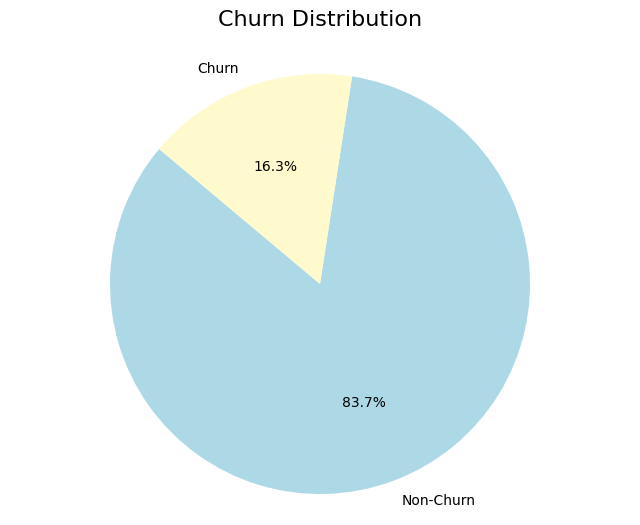

In [32]:
colors = ['#add8e6', '#fffacd']

plt.figure(figsize=(8, 6))
plt.title('Churn Distribution', pad=20, size=16)
plt.pie(
    churn_counts, 
    labels= ['Non-Churn','Churn'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors  
)
plt.axis('equal')  # Membuat pie chart bulat
plt.show()

Berdasarkan Grafik diatas, persentase Csutomer Non-Churn (83,7%) lebih besar dibandingkan dengan persentase Customer Churn (16,3%). Berdasarkan data, dataset ini merupakan dataset yang imbalance atau tidak seimbang, sehingga kita perlu melakukan resampling yaitu SMOTE (Synthetic Minority Oversampling Technique) yaitu menambah kelas minoritas yang akan dilakukan pada saat modeling. Hal ini dilakukan agar model dapat lebih efektif dalam memahami pola-pola yang ada di dalam data, terutama yang berkaitan dengan perilaku pelanggan yang berpotensi melakukan churn. 

Meskipun tingkat Customer Churn masih relatif rendah, kita masih dapat memperbaiki agar customer tidak melakukan Churn. Selanjutnya, akan dianalisis faktor-faktor apa saja yang mempengaruhi Customer Churn dan mengembangkan strategi untuk mengurangi tingkat Churn tersebut. 

Untuk mempermudah Visualisasi, saya membagi kolom menjadi 3 Variabel Type yaitu; Numerical, Ordinal dan Nominal. Untuk Numerikal dibagi lagi menjadi 2 yaitu; Kontinu dan diskrit. Untuk Kontinu yaitu kolom; Tenure, WarehouseToHome, DaySinceLastOrder dan CashbackAmount. Untuk Diskrit yaitu kolom; NumberOfDevice dan NumberOfAddress.

Sumber: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ 

**1.2. Churn By Numerical Variable Type**

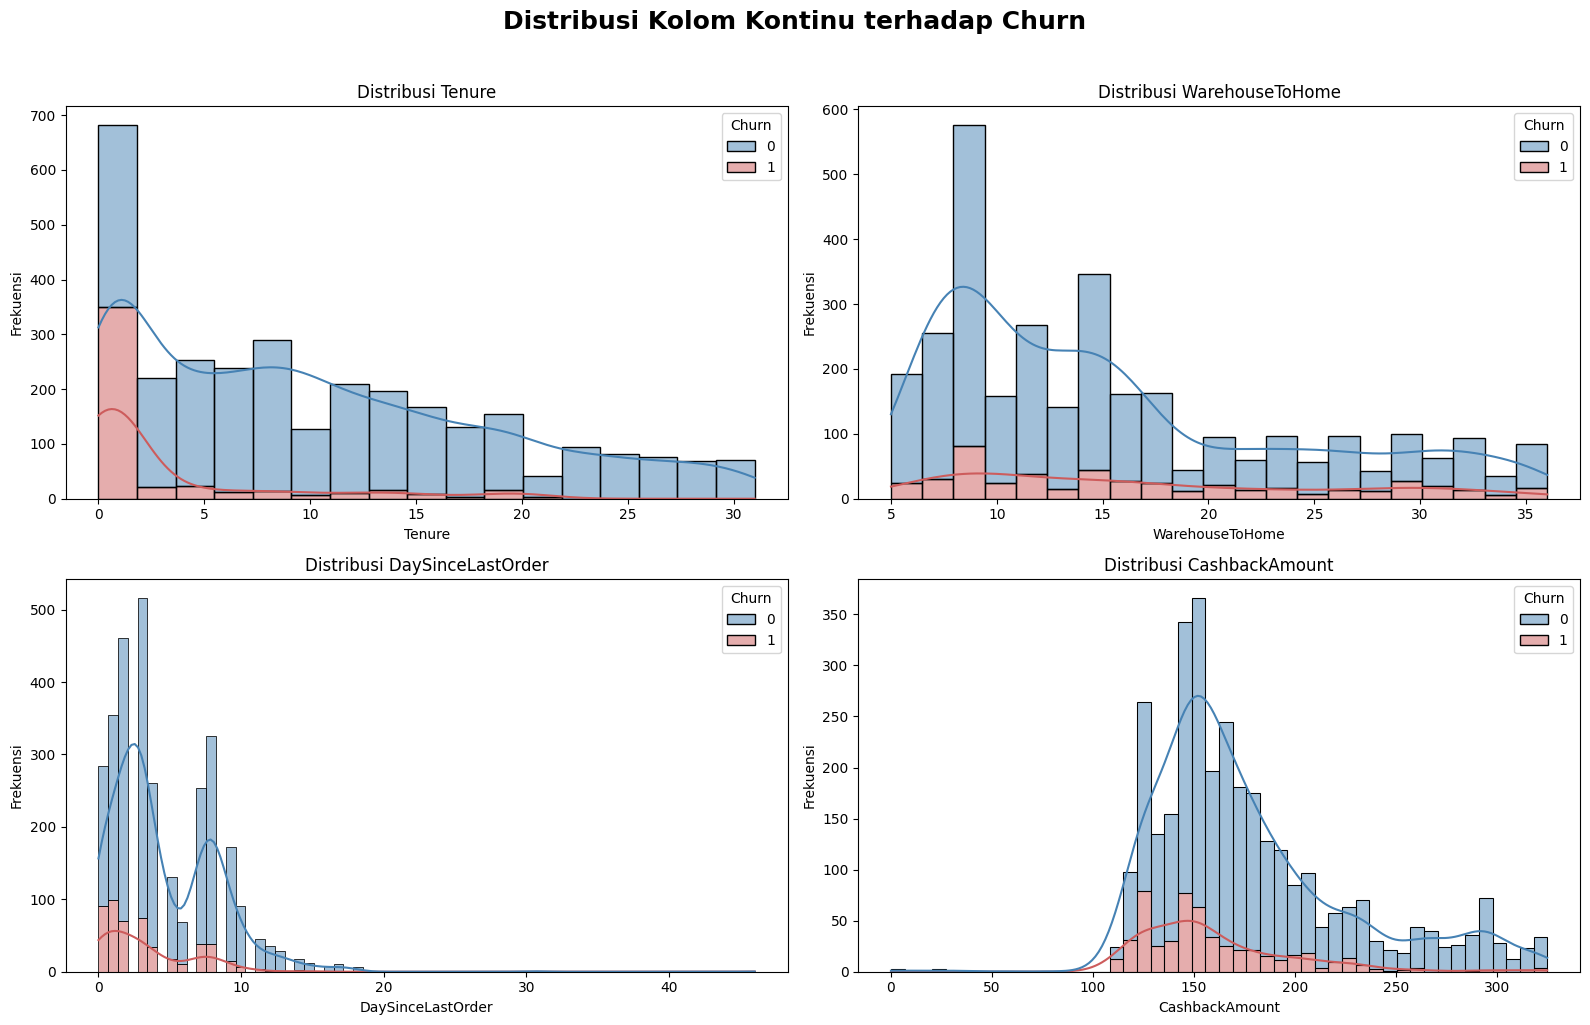

In [33]:
#Mengetahui Distribusi Kolom Kontinu terhadap Churn
# Daftar kolom kontinu
kolom_kontinu = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

# Warna untuk visualisasi
colors = ['steelblue', 'indianred']

# Membuat plot
plt.figure(figsize=(16, 10))  # Ukuran figure
for idx, column in enumerate(kolom_kontinu, start=1):
    plt.subplot(2, 2, idx)  # Membagi menjadi 2 baris, 2 kolom
    sns.histplot(
        data=df, 
        x=column, 
        hue='Churn', 
        kde=True, 
        palette=colors, 
        multiple='stack'
    )
    plt.title(f'Distribusi {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

# Memberikan judul utama
plt.suptitle('Distribusi Kolom Kontinu terhadap Churn', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Berdasarkan Grafik Diatas, dapat diambil beberapa kesimpulan:

**1. Tenure:**
- Mayoritas pelanggan churn memiliki tenure yang rendah (di bawah 5 bulan). Hal ini menunjukkan bahwa pelanggan baru cenderung lebih berisiko untuk churn.

- Pelanggan dengan tenure yang lebih lama cenderung lebih loyal (tidak churn).

**2. WarehouseToHome:**
- Jarak antara gudang ke rumah pelanggan yang lebih rendah (sekitar 5-15 satuan) memiliki jumlah churn yang lebih tinggi.

- Untuk jarak yang lebih jauh, churn terlihat berkurang, namun distribusi pelanggan juga semakin sedikit.

**3. DaySinceLastOrder:**
- Pelanggan churn cenderung memiliki interval waktu lebih lama sejak pesanan terakhir mereka. Ini menunjukkan bahwa pelanggan yang jarang bertransaksi lebih berisiko untuk churn.

- Sebaliknya, pelanggan yang sering bertransaksi (interval waktu pendek sejak pesanan terakhir) cenderung lebih loyal.

**4. CashbackAmount:**
- Pelanggan churn seringkali menerima cashback dalam jumlah yang relatif kecil (di bawah 100).

- Semakin tinggi jumlah cashback, semakin kecil peluang pelanggan untuk churn, meskipun distribusinya lebih terfokus pada pelanggan yang tidak churn.

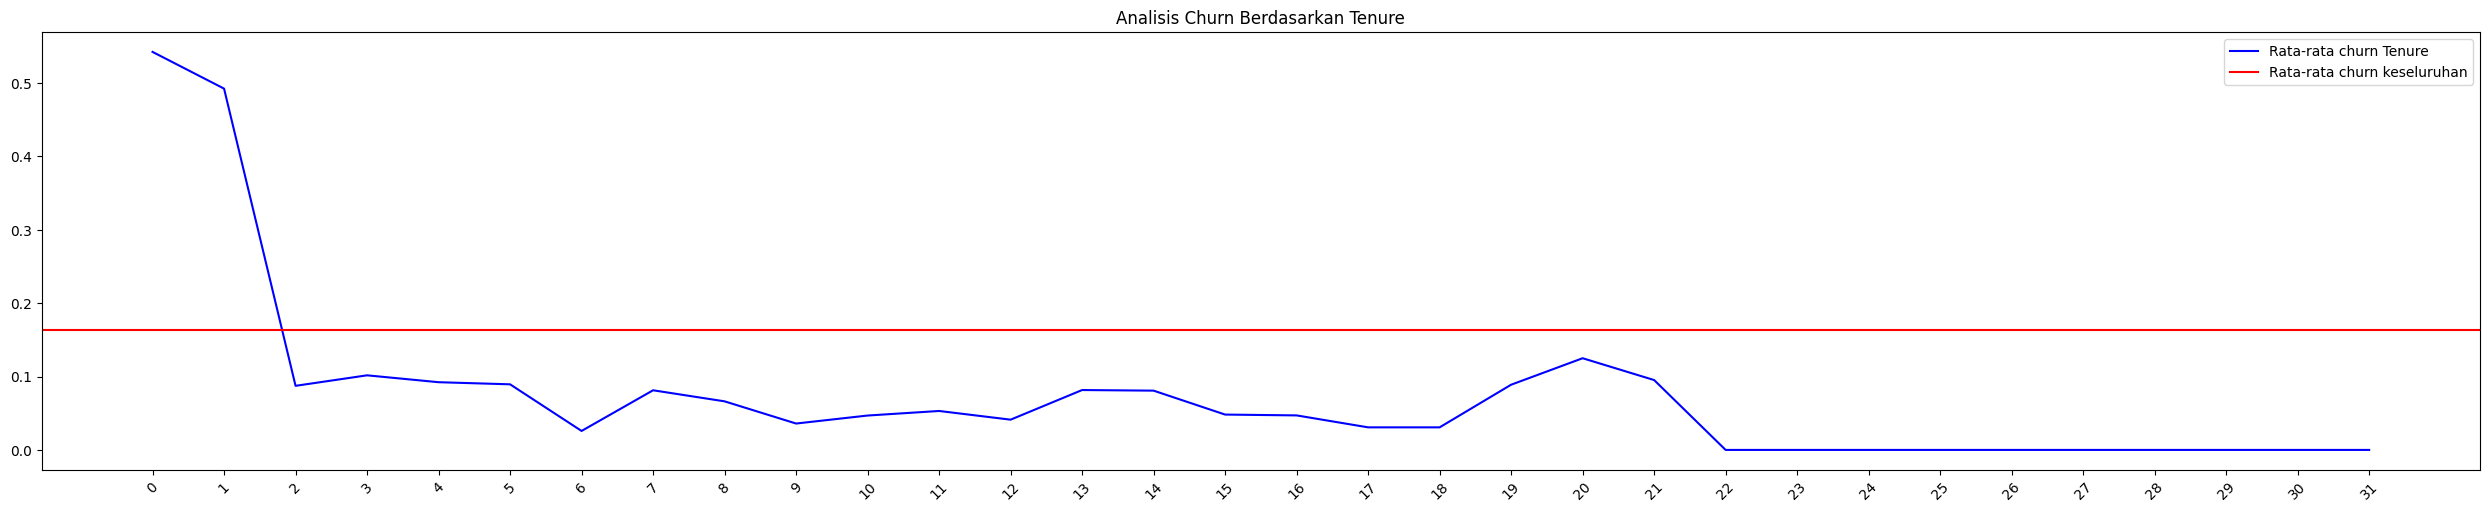

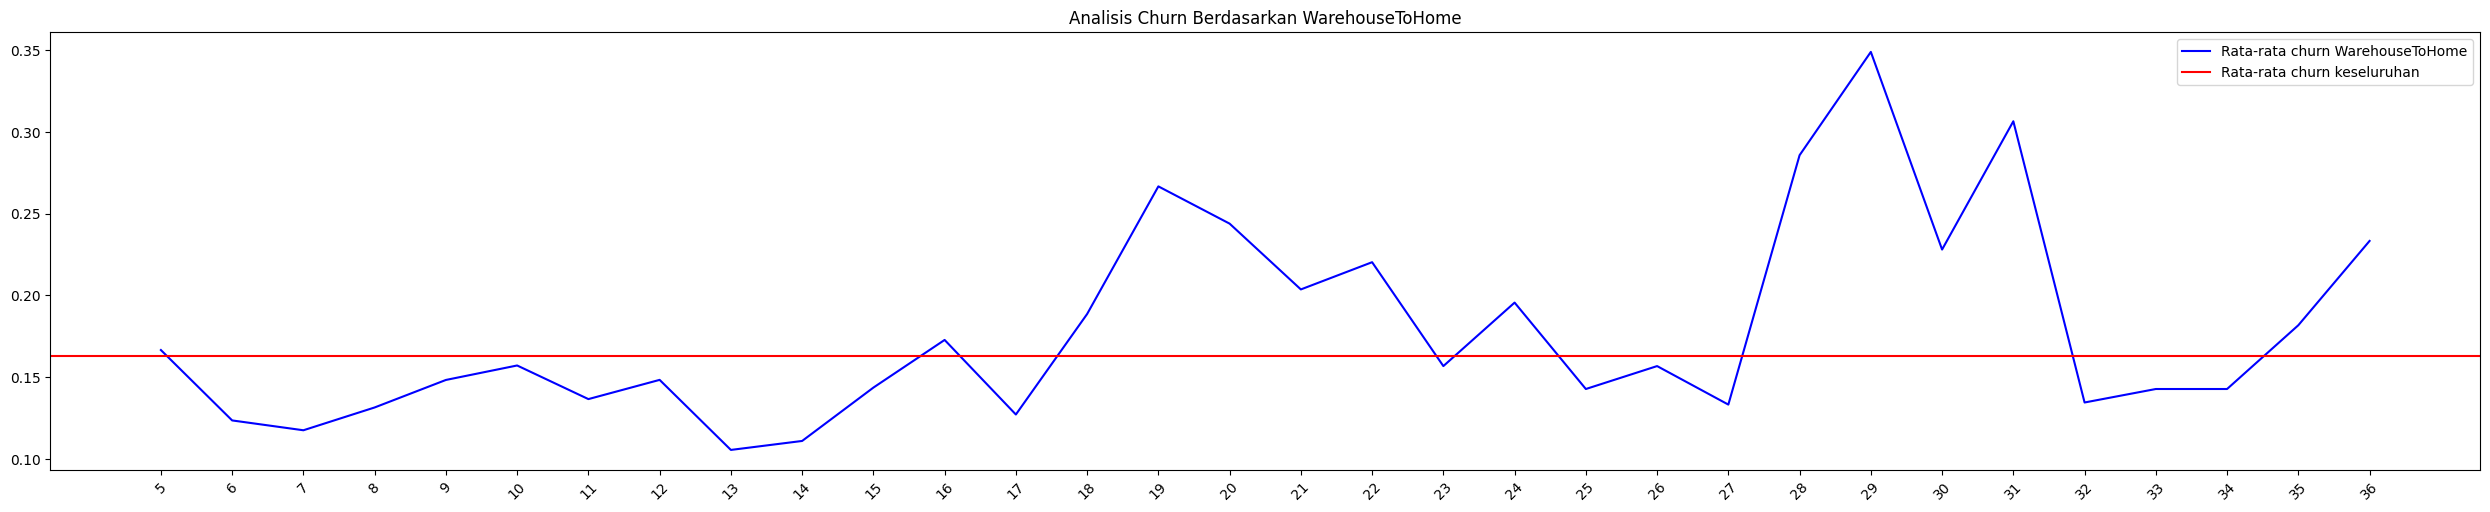

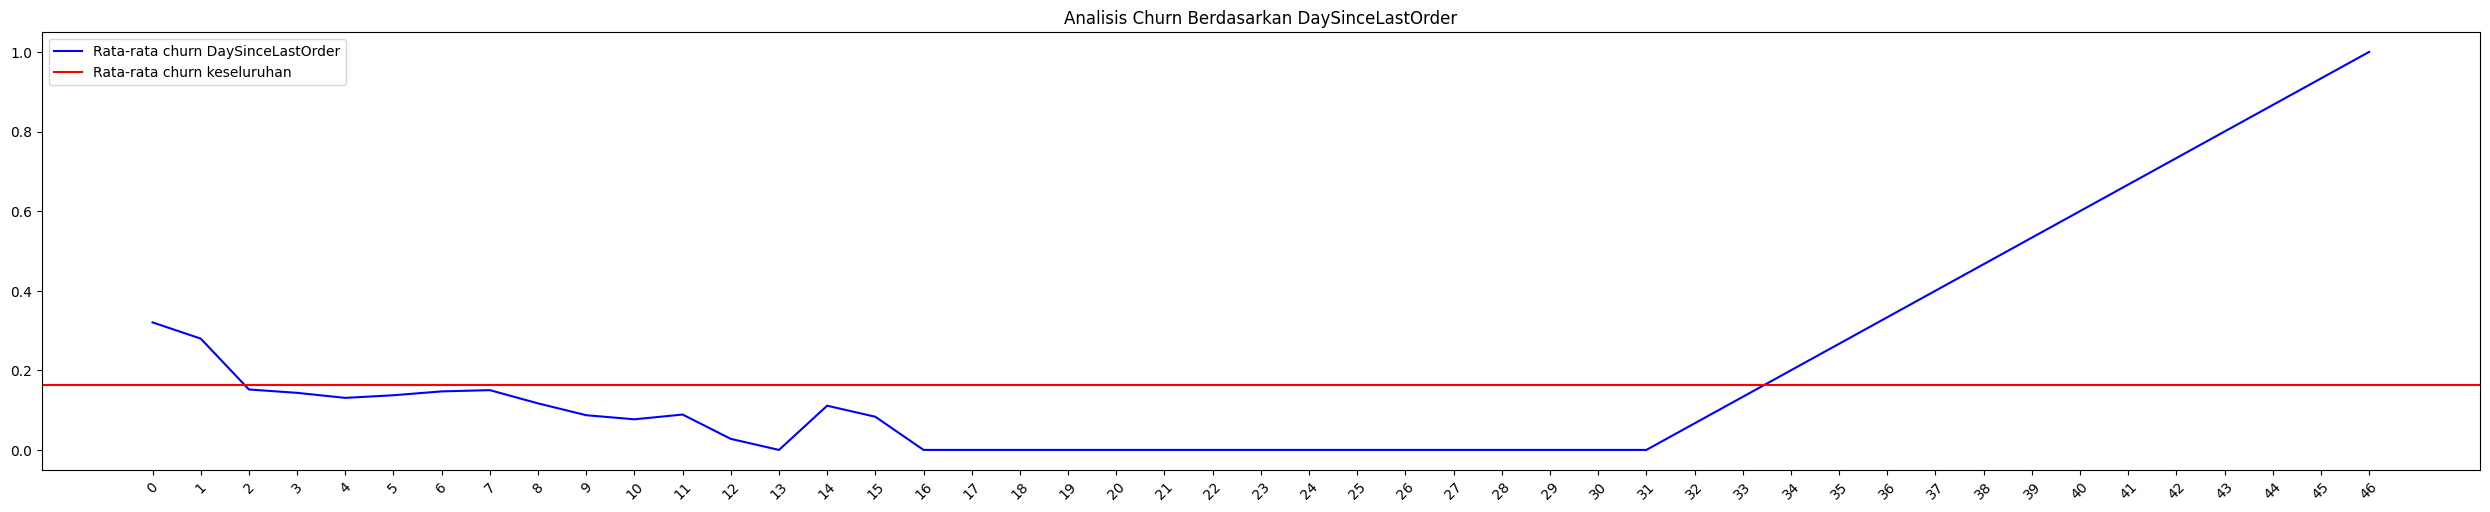

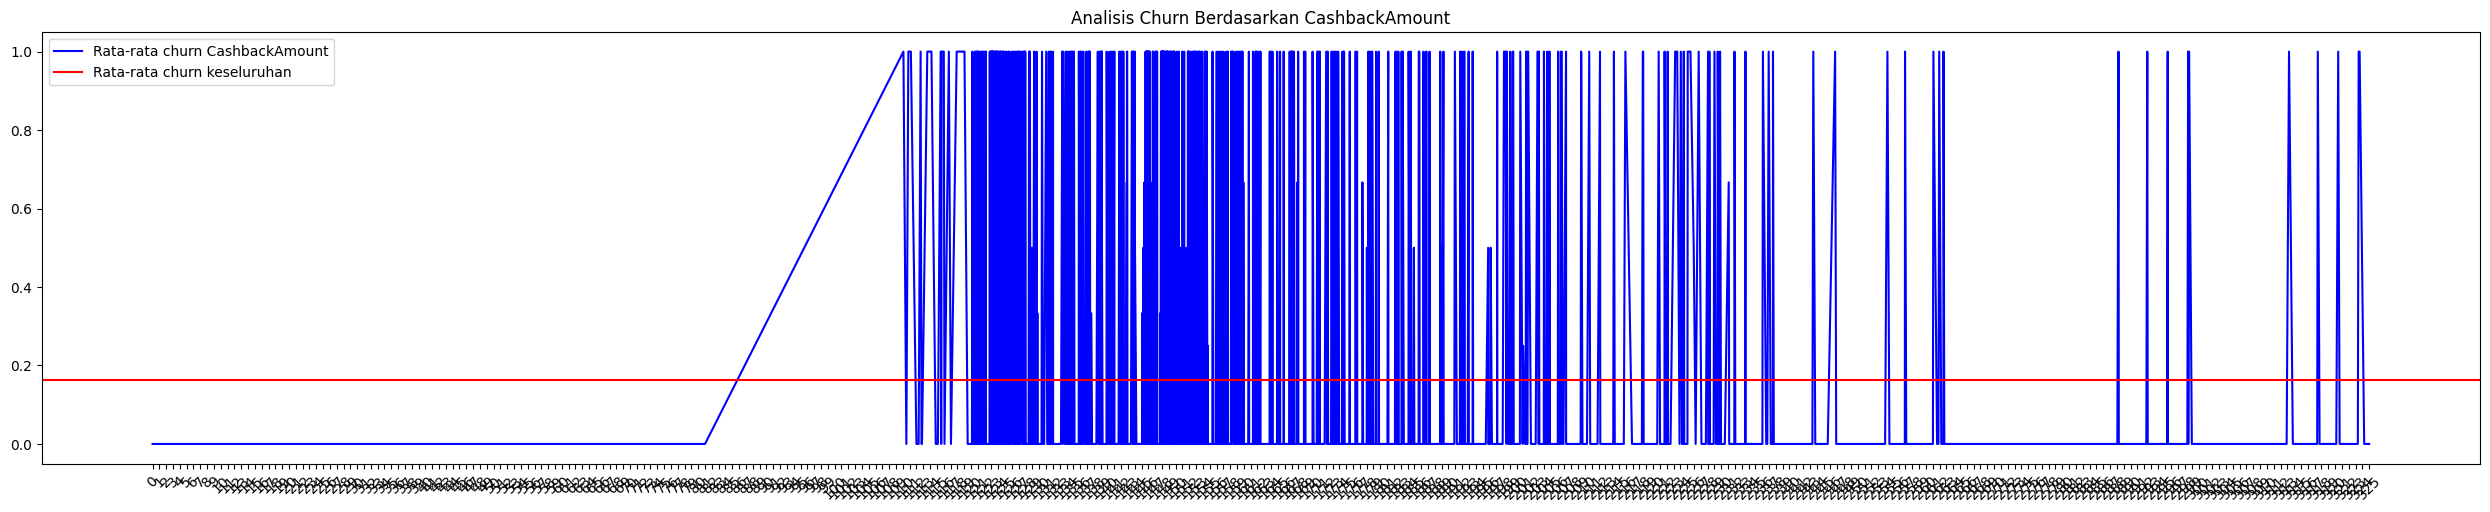

In [34]:
# Churn Berdasarkan Variabel Kolom Kontinu

# Menghitung rata-rata churn secara keseluruhan
rata_churn_total = df[df['Churn']==1]['Churn'].sum()/df.shape[0]

for kolom in kolom_kontinu:
    plt.figure(figsize=(25, 5))
    
    # Plot rata-rata churn berdasarkan grup dalam variabel
    plt.plot(df.groupby(kolom)['Churn'].mean(), label=f'Rata-rata churn {kolom}', color='b')
    
    # Garis horizontal untuk rata-rata churn keseluruhan
    plt.axhline(y=rata_churn_total, label='Rata-rata churn keseluruhan', color='r')
    
    # Menentukan batas dan penataan label sumbu X
    plt.xticks(np.arange(min(df[kolom]), max(df[kolom]) + 1, step=1.0), rotation=45)
    
    # Menambahkan keterangan dan elemen lain pada plot
    plt.tight_layout()
    plt.title(f'Analisis Churn Berdasarkan {kolom}')
    plt.legend()
    plt.show()

Berdasarkan Grafik diatas, dapat diambil kesimpulan:
- Rata-rata churn sangat tinggi pada pelanggan dengan tenure 0 hingga 2 bulan. Ini menegaskan bahwa pelanggan baru sangat rentan churn.
- Setelah tenure meningkat (di atas 2 bulan), rata-rata churn turun secara signifikan dan stabil di bawah rata-rata churn keseluruhan. Ini menunjukkan bahwa pelanggan yang bertahan melewati masa awal lebih cenderung loyal.
- Untuk tenure lebih dari 20 bulan, churn sangat rendah, bahkan mendekati nol. Pelanggan dengan tenure panjang sangat kecil kemungkinannya untuk churn.
- Rata-rata churn sangat meningkat pada pelanggan yang memiliki jarak antara rumah dan gudang >18 KM. Hal ini diduga karena semakin jauh jarak maka harga ongkos kirimnya lebih besar.
- Pada kolom **DaySinceLastOrder**, Churn tertinggi terjadi pada hari 0-2 setelah pembelian, yang mungkin disebabkan oleh pelanggan yang hanya mencari produk tertentu sesuai kebutuhan mereka di platform, tanpa memiliki ketertarikan khusus terhadap e-commerce tersebut.
- Rata-rata **CashbackAmount** sulit dianalisis karena memiliki variansi yang tinggi. Oleh karena itu, pengelompokan data menggunakan metode binning akan diterapkan pada tahap preprocessing.

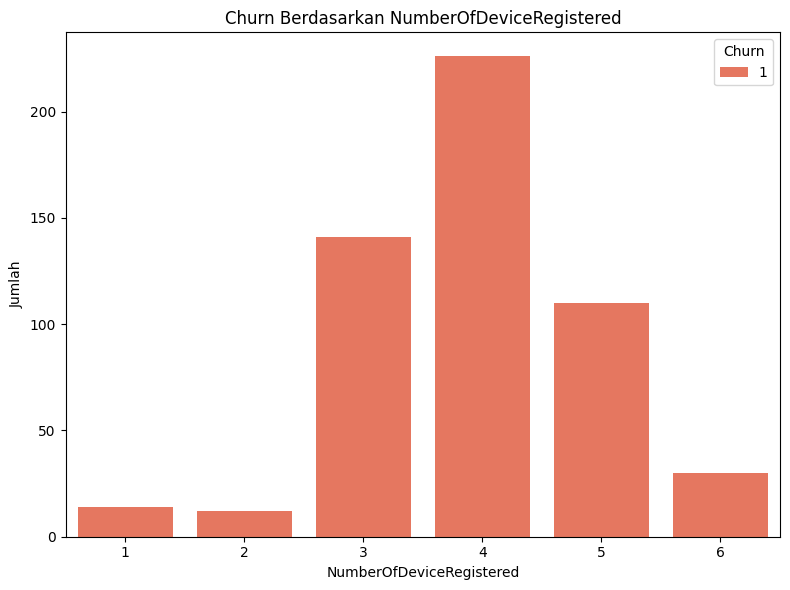

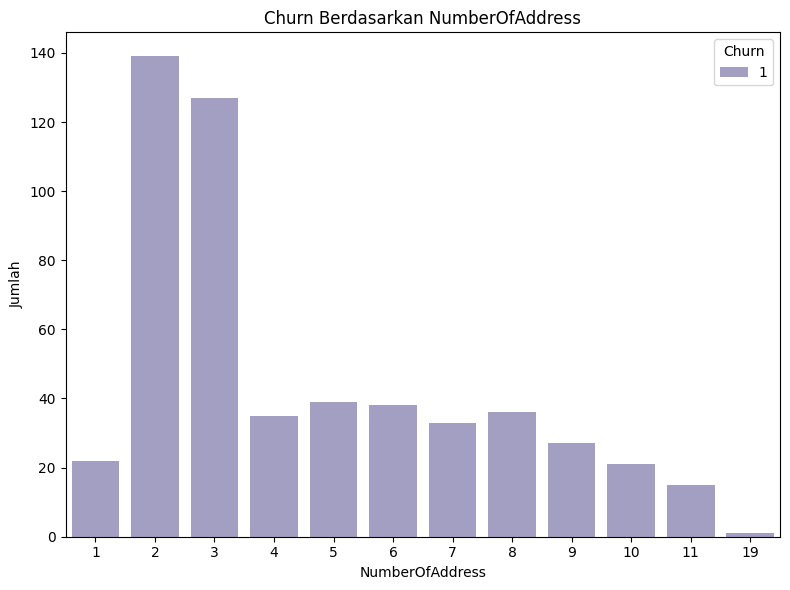

In [35]:
# Churn Berdasarkan Variabel Kolom Kontinu

## Daftar kolom kontinu
kolom_diskrit = ['NumberOfDeviceRegistered', 'NumberOfAddress']

#Warna untuk setiap Variabel
palet_warna = {
    'NumberOfDeviceRegistered': 'Reds', 
    'NumberOfAddress': 'Purples'
}

for kolom in kolom_diskrit:
    # Mengelompokkan data berdasarkan kolom dan churn
    grouped_data = df[df['Churn'] == 1].groupby([kolom, 'Churn']).size().reset_index(name='Count')
    
    # Membuat barplot
    plt.figure(figsize=(8, 6))
    sns.barplot(data=grouped_data, x=kolom, y='Count', hue='Churn', palette=palet_warna[kolom] )
    
    # Memberikan judul dan label
    plt.title(f'Churn Berdasarkan {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Jumlah')
    
    # Menampilkan grafik
    plt.tight_layout()
    plt.show()

**1.3 Churn By Ordinal Type**

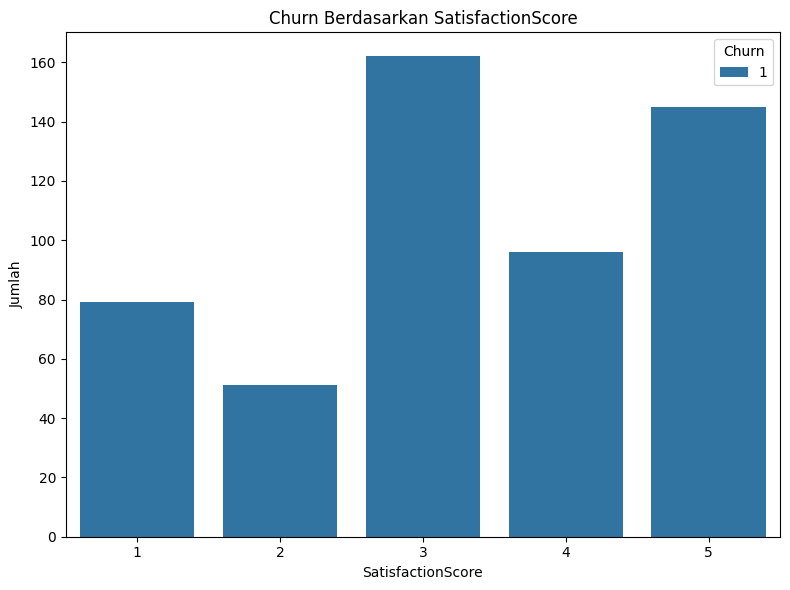

In [36]:
#Mengetahui Churn berdasarkan Satisfaction Score
# Variabel yang akan digunakan
kolom_ordinal = 'SatisfactionScore'

# Mengelompokkan data berdasarkan kolom dan churn
grouped_data = df[df['Churn'] == 1].groupby([kolom_ordinal, 'Churn']).size().reset_index(name='Count')

# Membuat barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x=kolom_ordinal, y='Count', hue='Churn')
# Memberikan judul dan label
plt.title(f'Churn Berdasarkan {kolom_ordinal}')
plt.xlabel(kolom_ordinal)
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

**1.4 Churn By Nominal Type**

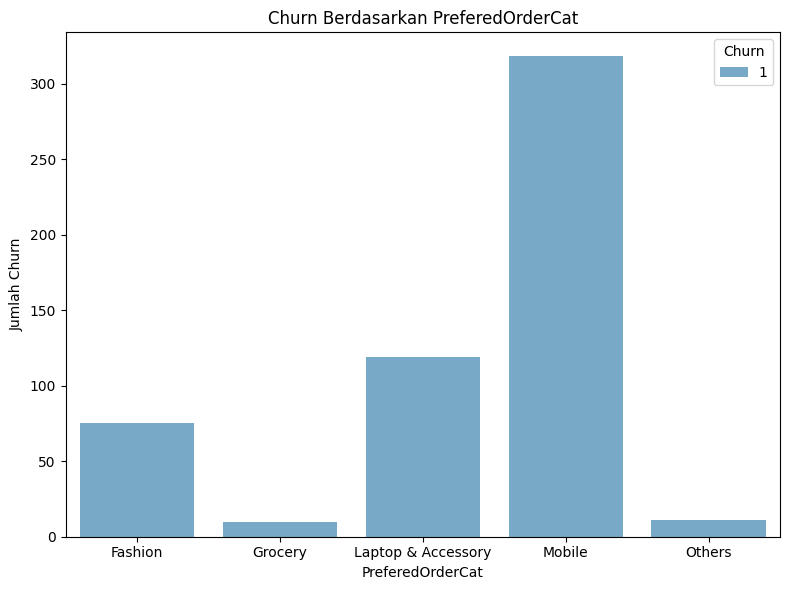

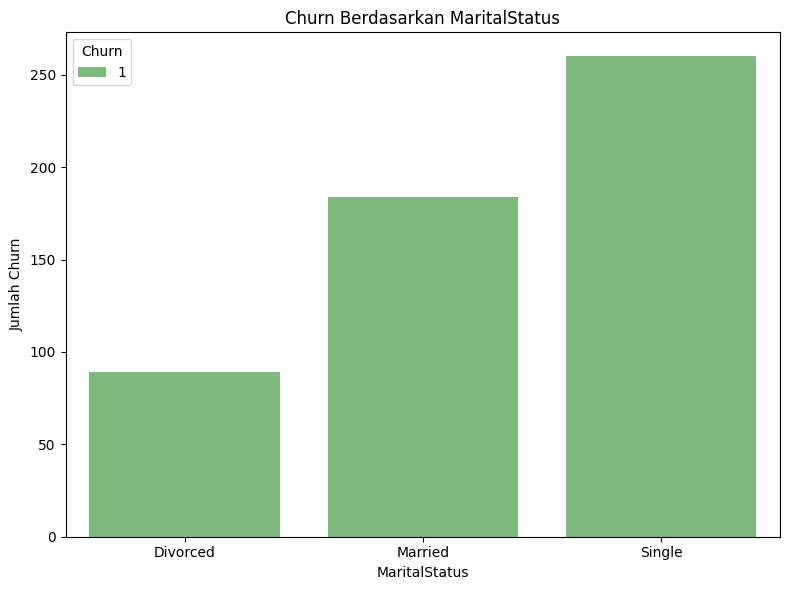

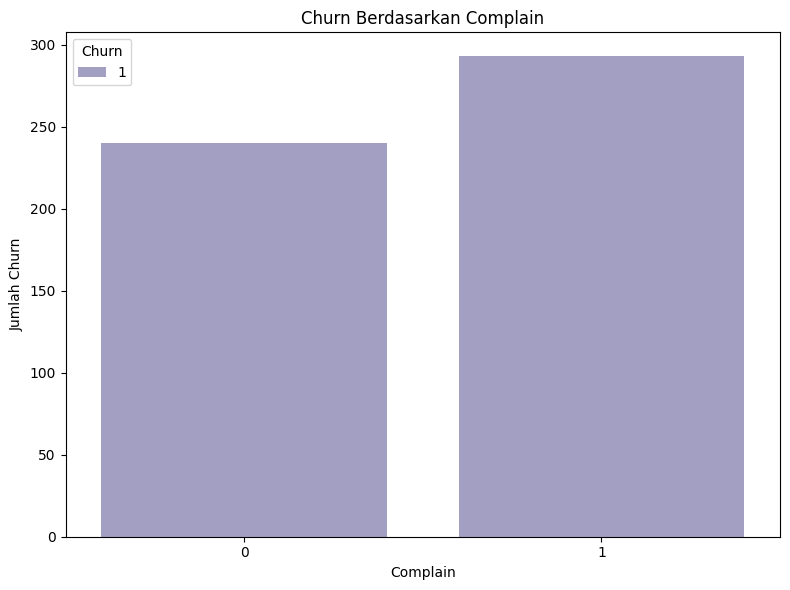

In [37]:
#Churn berdasarkan Kolom Nominal Type
## Daftar kolom kontinu
kolom_nominal = ['PreferedOrderCat', 'MaritalStatus', 'Complain']

# Palet warna yang berbeda untuk setiap kolom
palet_warna = {
    'PreferedOrderCat': 'Blues', 
    'MaritalStatus': 'Greens', 
    'Complain': 'Purples'
}
for kolom in kolom_nominal:
    grouped_data = df[df['Churn'] == 1].groupby([kolom, 'Churn']).size().reset_index(name='Count')
    plt.figure(figsize=(8, 6))
    sns.barplot(data=grouped_data, x=kolom, y='Count', hue='Churn', palette=palet_warna[kolom])
    plt.title(f'Churn Berdasarkan {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Jumlah Churn')
    plt.tight_layout()
    plt.show()


<Axes: xlabel='SatisfactionScore'>

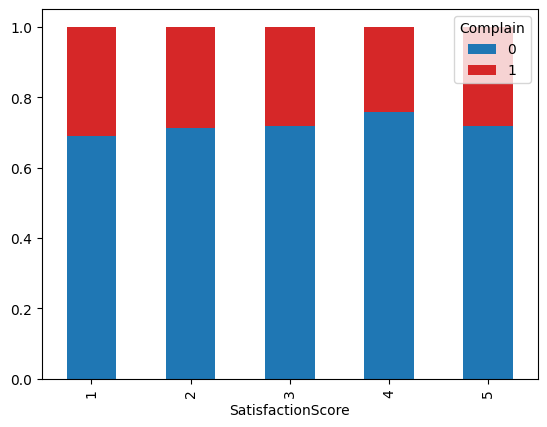

In [38]:
pd.crosstab(df['SatisfactionScore'],df['Complain'],normalize='index').sort_index().plot(color=['tab:blue',"tab:red"], kind='bar',stacked=True)

Berdasarkan Grafik diatas, dapat diambil beberapa kesimpulan:
- Pada Variabel Tipe **Kontinu**, Jumlah pelanggan churn paling banyak memiliki 3-4 device yang terhubung, dan 2-3 alamat. 
- Pada Variabel Tipe **Nominal**, Jumlah pelanggan churn paling banyak pada variabel **PreferedOrderCat** terdapat pada kategori Mobile. Pada variabel **MaritalStatus** terdapat pada kategori Single dan pada variabel **Complain** jumlah churn terbanyak terdapat pada pelanggan yang melakukan complain.
- Berdasarkan grafik kontingensi, Proporsi pelanggan yang churn dengan tingkat tertinggi memberikan penilaian kepuasan 5, dan mereka cenderung mengajukan keluhan. Ini mungkin disebabkan oleh kepuasan pelanggan terhadap platform e-commerce, namun terdapat masalah terkait dengan marketplace di dalam platform tersebut.

## Data Preprocessing dan Feature Engineering ##

In [39]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Setelah mengetahui data dari data cleaning dan analisis, tahapan selanjutnya yitu Preprocessing dan Feature Engineering, pada tahap ini akan dilakukan:
- Binning data CashbackAmount karena memiliki variansi yang tinggi. Pada tahap ini akan dibuat kolom kategorik baru.
- Handling Missing Value dengan IterativeImputer pada kolom Tenure, WarehouseToHome dan DaySinceLastOrder
- Melakukan OneHotEncoding pada kolom MaritalStatus 
- Melakukan BinaryEncoding pada kolom PreferedOrderCat
- Melakukan OrdinalEncoding pada kolom CashbackAmountCat 

**Binning**

In [81]:
# Melakukan binning pada kategori cashbackamount
binning_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['CashbackAmount_Bin']= pd.cut(df['CashbackAmount'], 5,labels = binning_labels)
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,CashbackAmount_Bin
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,Medium
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0,Low
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,Medium
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,High
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,Very High


In [82]:
df.groupby('CashbackAmount_Bin')['CashbackAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
CashbackAmount_Bin,,,,,,,,
Very Low,9.0,20.000000,19.118054,0.00,0.00,25.000,25.0000,56.00
Low,429.0,123.620047,4.686553,81.00,121.44,123.800,126.9500,129.96
Medium,1985.0,160.183703,16.306101,130.22,147.75,157.020,172.6500,194.62
High,517.0,220.068221,17.275935,195.05,204.75,218.960,232.4800,259.99
Very High,324.0,290.180556,18.422611,260.03,273.99,291.895,300.7125,324.99


**Data Splitting**

In [83]:
# Membuat fitur x dan target y
x = df.drop(columns=['Churn'])
y = df['Churn']

In [84]:
# Melakukan data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

Pertama dilakukan data splitting dengan train test split yang bertujuan untuk mengevaluasi performa model machine learning. Data train 80% dan data test 20% dengan random state 0, dan stratify y yang bertujuan untuk memastikan kedua data memiliki proporsi semua target (churn).

**Handling Missing Value**

In [85]:
def imputation(x_train, x_test, cont_features):
    imputerCont = IterativeImputer (random_state=0, missing_values=np.nan)
    imputerCont.fit(x_train[cont_features])
    x_train[cont_features] = imputerCont.transform(x_train[cont_features])
    x_test[cont_features] = imputerCont.transform(x_test[cont_features])
    return x_train, x_test

In [86]:
# Fit&transform missing value imputation
x_train , x_test = imputation(x_train, x_test,kolom_kontinu)

In [87]:
# Mengecek missing value
print(x_test.isna().sum(), x_test.isna().sum())

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
CashbackAmount_Bin          0
dtype: int64 Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
CashbackAmount_Bin          0
dtype: int64


Sudah tidak terlihat Missing Value pada Data, maka akan dilakukan Encoding.

**Encoding**

In [88]:
# Ordinal mapping kolom cashbackamountclass
ordinal_mapping = [
    {'col':'CashbackAmount_Bin',
    'mapping':{
        'Very Low' : 0,
        'Low': 1, 
        'Medium': 2, 
        'High' : 3,
        'Very High' : 4
    }}
]

In [89]:
# Transformer
feature_transformer = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(drop='first'), ['MaritalStatus']),  # OneHotEncoder untuk kolom 'MaritalStatus'
        ('ordinal_encoding', ce.OrdinalEncoder(mapping=ordinal_mapping), ['CashbackAmount_Bin']),  # Ordinal Encoding
        ('binary_encoding', ce.BinaryEncoder(), ['PreferedOrderCat'])  # Binary Encoding
    ],remainder='passthrough')

In [90]:
# Melihat preview hasil encoding 
testing = pd.DataFrame(feature_transformer.fit_transform(x_train), columns=feature_transformer.get_feature_names_out())
testing

,one_hot__MaritalStatus_Married,one_hot__MaritalStatus_Single,ordinal_encoding__CashbackAmount_Bin,binary_encoding__PreferedOrderCat_0,binary_encoding__PreferedOrderCat_1,binary_encoding__PreferedOrderCat_2,remainder__Tenure,remainder__WarehouseToHome,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__DaySinceLastOrder,remainder__CashbackAmount
0,0.0,0.0,2.0,0.0,0.0,1.0,13.0,8.0,4.0,3.0,7.0,0.0,0.0,134.48
1,0.0,1.0,2.0,0.0,0.0,1.0,1.0,11.0,5.0,2.0,3.0,1.0,4.0,169.87
2,1.0,0.0,2.0,0.0,0.0,1.0,13.0,8.0,1.0,4.0,2.0,0.0,7.0,142.44
3,0.0,1.0,2.0,0.0,1.0,0.0,1.0,15.0,5.0,3.0,3.0,1.0,3.0,164.89
4,0.0,1.0,2.0,0.0,0.0,1.0,1.0,11.0,5.0,1.0,3.0,1.0,4.0,169.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,0.0,1.0,2.0,0.0,0.0,1.0,1.0,22.0,1.0,5.0,1.0,0.0,7.0,156.61
2607,0.0,1.0,2.0,0.0,0.0,1.0,17.0,6.0,4.0,3.0,5.0,0.0,2.0,159.85
2608,0.0,1.0,2.0,0.0,1.0,0.0,7.0,15.0,5.0,1.0,2.0,0.0,3.0,148.42
2609,0.0,1.0,2.0,0.0,0.0,1.0,12.0,34.0,4.0,5.0,4.0,0.0,3.0,142.84


## Modelling ##

In [126]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()

*Model Benchmarking: SMOTE & Stratified K-Fold*


Beberapa hal yang perlu diperhatikan dalam benchmark model ini antara lain:

- Karena dataset ini tidak seimbang (imbalance), maka perlu dilakukan proses resampling. Metode yang digunakan untuk resampling adalah SMOTE yang bertujuan untuk menambahkan data pada kelas yang minoritas.
- Dilakukan stratified K-Fold untuk menjaga distribusi kelas target (churn) agar tetap konsisten saat melakukan pembagian data untuk cross-validation.
- Metrik yang digunakan adalah ROC-AUC, karena tujuan evaluasi adalah untuk melihat probabilitas.
- Pengaturan hyperparameter mengikuti nilai default, dan semua fitur akan digunakan dalam model.

In [127]:
models = [logreg,knn,dt,rf,xgb]
score=[]
rata=[]
std=[]

for i in models:
    smote_ = SMOTE(random_state=0)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',feature_transformer),
        ('resampling', smote_),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
XGBoost,0.938095,0.006777
Random Forest,0.929934,0.005728
Logistic Regression,0.864139,0.012254
KNN,0.797644,0.019514
Decision Tree,0.769141,0.014879


Pada hasil diatas dapat dilihat bahwa model terbaik dengan hyperparameter default adalah XGBoost dan Random Forest dengan nilai rata-rata ROC-AUC masing-masing 0.938 dan 0.929. Nilai metrik dinilai cukup tinggi, sehingga akan dicoba implementasi pada data test.

*Model Benchmarking: Test Data*

In [128]:
models = [logreg,knn,dt,rf,xgb]
score_roc_auc = []

def y_pred_func(i):
    smote_ = SMOTE(random_state=0)
    estimator=Pipeline([
        ('preprocess',feature_transformer),
        ('resampling', smote_),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84       546
           1       0.40      0.88      0.55       107

    accuracy                           0.76       653
   macro avg       0.68      0.81      0.69       653
weighted avg       0.88      0.76      0.79       653

KNN 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       546
           1       0.40      0.76      0.52       107

    accuracy                           0.77       653
   macro avg       0.67      0.77      0.69       653
weighted avg       0.85      0.77      0.80       653

Decision Tree 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       546
           1       0.57      0.69      0.62       107

    accuracy                           0.86       653
   macro avg       0.75      0.79      0.77       653
weighted avg       0.88      0

,roc_auc score
model,
Random Forest,0.953100
XGBoost,0.946407
Logistic Regression,0.913491
KNN,0.831476
Decision Tree,0.794512


Dari data diatas dapat dilihat untuk model Random Forest dan XGBoost merupakan model dengan ROC_AUC tertinggi yaitu masing-masing 0.953 dan 0.946. Sehingga step selanjutnya adalah meningkatkan performa dengan melakukan tuning hyperparameter pada model XGBoost dan Random Forest dan membandingkan performanya.

**Hyperparameter Tuning**


Hyperparameter tuning sangat penting dalam pengembangan model machine learning karena dapat secara signifikan meningkatkan kinerja model dengan mengoptimalkan parameter-parameter yang mengontrol proses pelatihan.
- Parameter yang Akan Dituning:
1. Random Forest:

- n_estimators (default 100): Jumlah pohon keputusan dalam hutan acak. Menambah jumlah pohon dapat meningkatkan akurasi, tetapi juga meningkatkan waktu pelatihan dan risiko overfitting.
- max_depth (default none): Kedalaman maksimal dari setiap pohon. Mengatur ini dapat mencegah pohon terlalu dalam (overfitting) atau terlalu dangkal (underfitting).
- max_leaf_nodes (default 1): Jumlah maksimum simpul daun dalam setiap pohon. Menyesuaikan parameter ini dapat membantu dalam membatasi kompleksitas model.
- max_features (default sqrt): Jumlah fitur yang dipertimbangkan untuk pemisahan pada setiap pohon. Ini mempengaruhi kecepatan pelatihan dan kualitas prediksi.

2. XGBoost:
- learning_rate (default 0.3): Kecepatan pembelajaran yang mengontrol seberapa besar langkah model dalam mengubah bobot untuk setiap iterasi. Mengatur learning rate yang lebih rendah dapat menghasilkan model yang lebih stabil, tetapi membutuhkan lebih banyak estimasi.
- max_depth (default 6): Kedalaman maksimum pohon dalam model XGBoost. Semakin dalam pohon, semakin kompleks model dan berisiko overfitting.
- n_estimators (default 100): Jumlah pohon dalam model. Semakin banyak estimasi, model dapat lebih kuat, tetapi juga memerlukan lebih banyak waktu untuk pelatihan.
- subsample (default 1): Proporsi data yang digunakan untuk melatih setiap pohon. Ini digunakan untuk mengurangi overfitting dengan mengacak data yang digunakan untuk melatih model.

In [129]:
smote_ = SMOTE(random_state=0)
xgb = XGBClassifier(random_state=0)
Pipe_rf = Pipeline([('preprocess', feature_transformer),('resampling', smote_), ('model_rf', rf)]) 
Pipe_xgb = Pipeline([('preprocess', feature_transformer),('resampling', smote_), ('model_xgb', xgb)])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# RandomForest Hyperparameter Tuning
hyperparam_rf = [{
              'model_rf__n_estimators':[200, 220], 
              'model_rf__max_depth':[13,17],
              'model_rf__min_samples_split':[2, 3],
              'model_rf__min_samples_leaf':[2, 3]
             }]

rf_grid = GridSearchCV(estimator = Pipe_rf,
                      param_grid = hyperparam_rf, 
                      cv = skfold, 
                      scoring = 'roc_auc',
                      error_score='raise',
                      verbose = 2)
rf_grid.fit(x_train,y_train)

# XGBoost Hyperparameter Tuning
hyperparam_xgb = [{
    'model_xgb__n_estimators': [100, 200],
    'model_xgb__subsample':[0.8,1],
    'model_xgb__max_depth': [5, 7],
    'model_xgb__learning_rate': [0.1, 0.2],
    'model_xgb__subsample':[0.8,1],
}]

xgb_grid = GridSearchCV(estimator = Pipe_xgb,
                      param_grid = hyperparam_xgb, 
                      cv = skfold, 
                      scoring = 'roc_auc', 
                      error_score='raise',
                      verbose = 2)

# Fitting model
xgb_grid.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.8s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.7s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.7s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.7s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.7s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.7s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('ordinal_encoding',
                                                                         OrdinalEncoder(mapping=[{'col': 'CashbackAmount_Bin',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=0, ...))]),
             param_grid=[{'model_xgb__learning_rate': [0.1, 0.2],
                          'model_xgb__max_depth': [5, 7],
                          'model_xgb__n_estimators': [100, 200],
                          'model_xgb__subsample': [0.8, 1]}],
             scoring='roc_auc', verbose=2)

In [130]:
from sklearn.model_selection import GridSearchCV
# Random Forest
print('Random Forest Hyperparameter')
print(rf_grid.best_score_)
print(rf_grid.best_params_)
# XGBoost 
print('XGBoost Hyperparameter')
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)   

Random Forest Hyperparameter
0.9302680850137968
{'model_rf__max_depth': 17, 'model_rf__min_samples_leaf': 2, 'model_rf__min_samples_split': 2, 'model_rf__n_estimators': 200}
XGBoost Hyperparameter
0.944478897347514
{'model_xgb__learning_rate': 0.2, 'model_xgb__max_depth': 7, 'model_xgb__n_estimators': 200, 'model_xgb__subsample': 1}


- **XGBoost** memberikan akurasi sedikit lebih tinggi (94.44%) dibandingkan **Random Forest** (93.02%), yang menunjukkan bahwa XGBoost lebih efektif dalam menangani data ini.
- Kedua model memberikan hasil yang sangat baik, dengan **XGBoost** menunjukkan keunggulan kecil dalam akurasi.
- **XGBoost** dengan parameter `learning_rate` 0.2 dan `max_depth` 7 menunjukkan bahwa model ini lebih mampu menangkap pola yang lebih kompleks.

Karena yang paling baik adalah XGBoost maka selanjutnya akan menggunakan XGBoost saja.

In [131]:
# Model XGBoost Tuned
best_model = xgb_grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(mapping=[{'col': 'CashbackAmount_Bin',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Very Low     0
Low          1
Medium       2
High         3
Very High    4
dtype: int64}]),
                                                  ['CashbackAmount_Bin']),
                                                 ('binary_encoding',
                                                  BinaryEnco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [132]:
# Model XGBoost Default
xgb = XGBClassifier()
estimator=Pipeline([
    ('preprocess',feature_transformer),
    ('resampling',smote_),
    ('model',xgb)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(mapping=[{'col': 'CashbackAmount_Bin',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Very Low     0
Low          1
Medium       2
High         3
Very High    4
dtype: int64}]),
                                                  ['CashbackAmount_Bin']),
                                                 ('binary_encoding',
                                                  BinaryEnco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [133]:
# Melihat perbandingan model dengan default dan hyperparameter tuning
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default xgb : ', roc_auc_default)
print('ROC AUC Score Tuned xgb : ', roc_auc_tuned)

ROC AUC Score Default xgb :  0.946407175379138
ROC AUC Score Tuned xgb :  0.9575844716031632


Berdasarkan hasil diatas, maka dapat disimpulkan:
- Model XGBoost dengan hyperparameter default memiliki skor ROC AUC sebesar 0.9464.
- Setelah dilakukan tuning hyperparameter, skor ROC AUC meningkat menjadi 0.9576.
- Ini menunjukkan bahwa tuning hyperparameter memberikan kontribusi positif terhadap performa model, dengan peningkatan sebesar 0.0112 atau 1.18%.

In [134]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost : \n', report_default)
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       546
           1       0.81      0.70      0.75       107

    accuracy                           0.92       653
   macro avg       0.87      0.83      0.85       653
weighted avg       0.92      0.92      0.92       653

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       546
           1       0.82      0.73      0.77       107

    accuracy                           0.93       653
   macro avg       0.88      0.85      0.87       653
weighted avg       0.93      0.93      0.93       653



Berdasarkan hasil perbandingan Default dan Tuned diatas, didapatkan kesimpulan:
- Model yang telah dituning menunjukkan peningkatan performa di seluruh metrik, terutama dalam recall dan F1-score untuk kelas minoritas (1) (recall: dari 0,70 -> 0,73 dan f1-score: dari 0,75 -> 0,77)
- Akurasi meningkat dari 0.92 menjadi 0.93.
- Sehingga model yang akan digunakan adalah model hyperparameter yang telah tuning, dengan metrik yang didapatkan pada kelas positif yaitu recall 0.73 dan precision 0.82, dengan f1 score 0.77. Pada kelas negatif didapat recall 0.97 dan precision 0.95, dengan f1 score 0.96.

In [135]:
# Model Akhir
best_model = xgb_grid.best_estimator_
Churn_model = best_model.fit(x_train, y_train)

**Feature Importance**

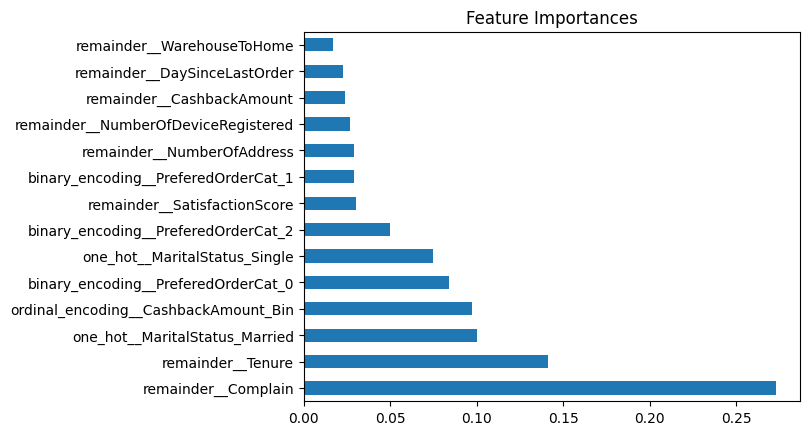

In [136]:
coef1 = pd.Series(best_model[2].feature_importances_, feature_transformer.get_feature_names_out()).sort_values(ascending=False)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Dari data yang diperoleh, dapat disimpulkan faktor-faktor yang memengaruhi potensi pelanggan untuk mengalami churn dan model machine learning yang digunakan. Fitur yang paling penting adalah keluhan pelanggan (complain), diikuti oleh lama masa berlangganan (tenure), serta Marital status. Analisis ini dapat diperbaiki lebih lanjut dengan melakukan seleksi fitur atau kombinasi fitur yang memiliki pengaruh signifikan, guna mengurangi kompleksitas model dan membandingkannya dengan model terbaik yang ada saat ini.

Selain itu, faktor-faktor tersebut memberikan wawasan penting bagi bisnis. Perusahaan perlu mengutamakan umpan balik dari pelanggan yang mengajukan keluhan dan segera menindaklanjuti keluhan tersebut, baik melalui platform e-commerce maupun marketplace yang terdaftar. Selain itu, perusahaan juga dapat meningkatkan retensi pelanggan dengan menawarkan promo menarik secara berkelanjutan, terutama bagi pelanggan yang berlangganan.

**Model Akhir**

In [137]:
# Export model
best_model = xgb_grid.best_estimator_
Churn_model = best_model.fit(x_train, y_train)
pickle.dump(Churn_model, open('Model_final.sav', 'wb'))

In [138]:
# Functions
def duplikat(data):
    data.drop_duplicates(inplace=True)

def outlier(data,features):
    for i in range(0, len(features)):
        Q1 = data[features[i]].quantile(0.25)
        Q3 = data[features[i]].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound =  Q1 - (1.5 * IQR)
        upper_bound =  Q3 + (1.5 * IQR)
        condition = (data[features[i]]< lower_bound) | (data[features[i]]> upper_bound)
        outlier = data.loc[condition, features[i]].count()
        PersentaseOutlier = outlier/data[features[i]].count()*100
        if PersentaseOutlier <= 1:
            data.drop(data[data[features]>upper_bound].index,inplace=True)

def binning(data,kolomcashback):
    bin_labels= ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    data['CashbackAmount_Bin']= pd.cut(data['CashbackAmount'], 4,labels = bin_labels)

def imputation(data, cont_features):
    imputerCont = IterativeImputer(random_state=0, missing_values=np.nan)
    imputerCont.fit(data[cont_features])
    data[cont_features] = imputerCont.transform(data[cont_features])
    return data

def pred(data):
    Churn = pickle.load(open('Model_final.sav', 'rb'))
    Churn_pred = Churn.predict(data.drop(columns='Churn'))
    data['Churn_pred'] = Churn_pred
    return data.head()

Dalam penerapan model, ada beberapa langkah penting yang perlu diperhatikan, yaitu sebelum menggunakan model, data harus melalui beberapa proses yang telah ditentukan, antara lain:

1. Menghapus duplikat data.
2. Handling outlier dengan menghapus data pada kolom Tenure dan WarehouseToHome.
3. Melakukan binning pada kolom CashbackAmount.
4. Handling missing value.
5. Menggunakan model untuk memprediksi apakah pelanggan berpotensi churn atau tidak.

## Conclusion and Recommendation

In [140]:
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       546
           1       0.82      0.73      0.77       107

    accuracy                           0.93       653
   macro avg       0.88      0.85      0.87       653
weighted avg       0.93      0.93      0.93       653



Berdasarkan hasil diatas dapat disimpulkan: 
- Model dapat dengan akurat mengidentifikasi 97% pelanggan yang tidak churn (kelas 0) berdasarkan recall.
- Model dapat mengidentifikasi 73% pelanggan yang churn (kelas 1), meskipun performanya lebih rendah dibandingkan dengan kelas non-churn.
- Model mampu memprediksi dengan benar pelanggan yang akan churn (kelas 1) adalah 82% berdasarkan precision.
- Terdapat sekitar 3% pelanggan yang tidak churn namun diprediksi sebagai churn (false positives).
- Terdapat sekitar 27% pelanggan yang churn namun diprediksi sebagai tidak churn (false negatives).


**Pengaplikasian Model**

Berdasarkan dataset yang digunakan terdapat 3264 pelanggan. Dengan pelanggan yang churn sebanyak 533 orang dan non churn sebanyak 2731 orang. Semisal biaya promosi untuk satu pelanggan 15 dan biaya mendapatkan pelanggan baru 40. Maka kurang lebih perhitungannya sebagai berikut: 

Tanpa Model (Semua pelanggan diberikan penawaran):
- Total Biaya = 3264 x 15 = 48.960 USD
- Total Pelanggan Churn yang ditemukan = 533 orang
- Total pelanggan Churn yang ditemukan = 2731 orang
- Biaya yang terbuang jika semua diberikan promosi = 2731 x 15 = 40.965 USD

Dengan model (Penawaran diberikan sesuai prediksi):
- Total Biaya = (533 x 0.73) x 15 = 5.836 USD
- Total Pelanggan Churn yang ditemukan = 533 x 0.73 = 389 orang
- Total Pelanggan Churn yang tidak ditemukan
<br>
  Pelanggan Churn yang tidak ditemukan = 533 - 389 = 159
<br>
<br>
- Total Pelanggan Tidak Churn yang ditemukan = (2731 x 0.97) = 2.649 orang
- Total Pelanggan tidak churn yang tidak  ditemukan
<br>
  Pelanggan Tidak Churn yang tidak ditemukan = 2731 - 2649 = 82
  <br>
  <br>
- Biaya yang terbuang = (82 x 15 USD) + (159 x 40 USD) = 1.230 + 6.360 = 7.590 USD
- Jumlah Penghematan = 40.965 - 7.590 = 33.375 USD

Dengan adanya bantuan model, perusahan e-commerce dapat menghemat biaya yang cukup besar dengan melakukan pemasaran yang lebih tepat sasaran. 

Berdasarkan analisis faktor yang mempengaruhi Churn, Complain dan Tenure merupakan faktor yang paling mempengaruhi. Sehingga perusahaan perlu memperhatikan faktor-faktor tersebut.



**Rekomendasi**


- Business:
    - Secara aktif mengumpulkan umpan balik pelanggan dan mengambil langkah-langkah nyata untuk meningkatkan kualitas layanan atau produk. Misal: Setelah transaksi atau pengiriman, kirimkan survei kepuasan pelanggan dan beri insentif bagi mereka yang memberikan umpan balik.
    - Melaukan pembaharuan pada aplikasi di mobil atau website agar customer dapat merasakan user experience yang berkesan.
    - Menanggapi keluhan pelanggan terkait kemudahan penggunaan platform e-commerce, memperluas pilihan produk dengan menjalin kerja sama dengan mitra, meningkatkan kualitas layanan melalui live chat antara pelanggan, pembeli, dan pusat dukungan, serta memantau dan memberikan pelatihan kepada mitra marketplace yang terdaftar agar dapat menyediakan layanan dan produk yang memuaskan.
    - Menawarkan promo, cashback, atau langganan kepada pelanggan baru dengan masa tenure 0-2 bulan yang berisiko churn, guna meningkatkan minat mereka untuk terus menggunakan platform e-commerce. 
    - Memberikan penawaran potongan biaya pengiriman kepada pelanggan yang berisiko churn dan memiliki jarak jauh antara gudang dan alamat pengiriman. Atau dengan memperbanyak warehouse khusus di wilayah yang menjadi tempat pembeli terbanyak sehingga proses pengantaran ke customer lebih cepat. 
    - Menggunakan model machine learning yang telah dibuat sebagai solusi untuk menentukan strategi pemasaran yang tepat sasaran

- Model:
    - Menambah atau memperbanyak kolom dengan fitur lain seperti waktu pengiriman produk, wilayah yang pelanggan, daerah atau kota pelanggan atau kolom service helpful atau tidak, dan sebagainya yang berhubungan dengan service.
    - Saat pengambilan data, diharapkan terdapat kolom ID pelanggan untuk menghindari duplikasi data, serta memastikan bahwa data yang diperoleh tidak mengandung nilai yang hilang (missing value).
    - Memilih fitur berdasarkan tingkat kepentingannya dan mencoba berbagai kombinasi fitur yang berpengaruh untuk mengurangi kompleksitas model.
    - Meningkatkan recall dengan menyesuaikan threshold.
    - Handling imbalance data dengan oversampling dan Mencoba dengan model lain seperti LightGBM.


Dengan adanya rekomendasi diatas, diharapkan perusahaan e-commerce dapat menurunkan biaya marketing dan diharapkan dapat meningkatkan profit dengan adanya pelanggan loyal.
